### ay data need to be in the NetCDF before the debiasing the ACS chl
#### Note: this is based on the NASA HPLC xls file for AMT29

In [1]:
# this is to make the Jupyter notebook as wide as the screen (on the Mac at least)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%config InlineBackend.figure_format ='retina'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from scipy import signal as sg
from datetime import datetime as dt

In [3]:
%matplotlib notebook

In [4]:
def prcrng(x):
    return (np.nanpercentile(x,84) - np.nanpercentile(x,16))/2.

In [5]:
DIN_hplc = "/data/datasets/cruise_data/archived/AMT19/modellers/backup/AMT19/AMT19/Processed/HPLC/"
DIN_acs = "/users/rsg/tjor/scratch_network/AMT_underway/AMT19/Processed/Step3/"

In [6]:
fn_hplc =  "hplc_amt19.csv"
fn_optics = "amt19_final.nc"

In [7]:
print(DIN_hplc + fn_hplc)

df_hplc = pd.read_csv(DIN_hplc + fn_hplc, header = 8, engine='python')

#df_hplc = pd.read_excel(DIN_hplc + fn_hplc, sheet_name = "Report", header = 8, engine = 'openpyxl')
df_hplc.keys()

print(df_hplc.keys())

df_hplc

/data/datasets/cruise_data/archived/AMT19/modellers/backup/AMT19/AMT19/Processed/HPLC/hplc_amt19.csv
Index(['Horn Point Lab sample code', 'PI', 'Original PI Sample Code',
       'Cruise Name', 'Sequential Sample Number',
       'Indicate if filter is duplicate', 'Volume filtered (ml)', 'station',
       'bottle number', 'Name of Water Body', 'Water Type',
       'collected with positive pressure or vaccuum', 'Year of Sample',
       'Gregorian Month', 'Day of Gregorian Month', 'Sequential Day of Year',
       'GMT Time', 'Depth (meters)', 'Longitude', 'Latitude',
       'Filter storage before shipping to HPL', 'Filter type',
       'Filter diameter (mm)', 'date extracted at Horn Point (month/day/year)',
       'Vx (ml)', '[TChl a]', '[TChl b]', '[TChl c]', '[Caro]', '[But fuco]',
       '[Hex fuco]', '[Allo]', '[Diad]', '[Diato]', '[Fuco]', '[Perid]',
       '[Zea]', '[Chl a]', '[DVChl a]', '[Chlide a]', '[Chl b]', '[DVChl b]',
       '[Chl c1]', '[Chl c2]', '[Chl c12]', '[Chl c3]', '[

,Horn Point Lab sample code,PI,Original PI Sample Code,Cruise Name,Sequential Sample Number,Indicate if filter is duplicate,Volume filtered (ml),station,bottle number,Name of Water Body,...,[PSC]/[TCaro],[PPC]/[TCaro],[TChl]/[TCaro],[PPC]/[Tpig],[PSP]/[TPig],[TChl a]/[TPig],microplankton [mPF],nanoplankton [nPF],picoplankton [pPF],comments
0,10-0586,"Dall'Olmo, Giorgio",GDO,AMT19 (RRS James Cook),F1,0.0000000000000000,2020.0,F1,flow through,Atlantic Ocean,...,0.47,0.53,1.54,0.21,0.79,0.45,0.05,0.42,0.52,NaN
1,10-0586.5,"Dall'Olmo, Giorgio",GDO,AMT19 (RRS James Cook),F1,0.0000000000000000,2020.0,F1,flow through,Atlantic Ocean,...,0.47,0.53,1.54,0.21,0.79,0.45,0.05,0.42,0.52,NaN
2,10-0587,"Dall'Olmo, Giorgio",GDO,AMT19 (RRS James Cook),F2,0.0000000000000000,2020.0,F2,flow through,Atlantic Ocean,...,0.55,0.45,1.43,0.18,0.82,0.43,0.07,0.51,0.42,NaN
3,10-0588,"Dall'Olmo, Giorgio",GDO,AMT19 (RRS James Cook),F3A,0.0000000000000000,2020.0,F3A,flow through,Atlantic Ocean,...,0.42,0.58,1.53,0.23,0.77,0.48,0.05,0.38,0.57,NaN
4,10-0589,"Dall'Olmo, Giorgio",GDO,AMT19 (RRS James Cook),F3B,D,2020.0,F3B,flow through,Atlantic Ocean,...,0.42,0.58,1.51,0.23,0.77,0.48,0.07,0.37,0.56,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,10-0985,"Dall'Olmo, Giorgio",GDO,AMT19 (RRS James Cook),F103,0.0000000000000000,1000.0,F103,flow through,Atlantic Ocean,...,0.64,0.36,1.51,0.14,0.86,0.45,0.44,0.34,0.21,NaN
107,10-0986,"Dall'Olmo, Giorgio",GDO,AMT19 (RRS James Cook),F104,0.0000000000000000,1000.0,F104,flow through,Atlantic Ocean,...,0.87,0.13,1.45,0.05,0.95,0.42,0.10,0.84,0.05,NaN
108,10-0987,"Dall'Olmo, Giorgio",GDO,AMT19 (RRS James Cook),F105A,0.0000000000000000,1000.0,F105A,flow through,Atlantic Ocean,...,0.72,0.28,1.44,0.11,0.89,0.43,0.35,0.49,0.16,NaN
109,10-0988,"Dall'Olmo, Giorgio",GDO,AMT19 (RRS James Cook),F105B,0.0000000000000000,1000.0,F105B,flow through,Atlantic Ocean,...,0.71,0.29,1.45,0.12,0.88,0.43,0.34,0.49,0.17,NaN


In [8]:
# NO HPLC META DATA IN AMT24


#print(DIN_hplc + fn_meta)
#df_meta = pd.read_excel(DIN_hplc + fn_meta, header = 0)
#df_meta.keys()
#list(df_meta['NAME'])


#label = []; # match sample/name ID between meta and hplc file
#for i in range(len(df_meta)):
 #   old_string = (str(df_meta['NAME'][i]))
  #  new_string = old_string.replace(":", "" )
   # label.append(new_string)

#df_meta['Label'] = label


#print(df_meta['Label'])

In [9]:
# merge two tables to extract info from df_meta

# NASA METADATA ALREADY INCLUDED IN SHEET

#print(df_hplc['Label'])
#print(df_meta['Label'])

#df_hplc = pd.merge(df_hplc, df_meta, on=['Label'])

#sorted(df_hplc.keys())

In [10]:
# convert PML pigment names to NASA pigment names for submission
#                            PML  :  NASA

#
#pml2nasa = {            
 #                         "[Allo]":"Allo",
  #                        "[Asta]": "Asta",
   #                       "[Anth]": "PML_only_Anth",
    #                  "[But fuco]":"But-fuco",
     #                     "[Caro]":"Alpha-beta-Car", # !!!! TO CHECK !!!
      #                   "[Chl a]":'Chl_a',
       #      "[Chl b] + [DVChl b]":"PML_only_Chl_b_DVChl_b",
        #                '[Chl c1]':'Chl_c1',
         #               '[Chl c2]':'Chl_c2',
          #              '[Chl-c3]':'Chl_c3',
           #           "[Chlide a]":"Chlide_a",
            #              "[Diad]":"Diadino",
            #             "[Diato]":"Diato",
             #          "[DVChl a]":"DV_Chl_a",
             #             "[Fuco]":"Fuco",
              #        "[Hex fuco]":"Hex-fuco",
              #             "[Lut]":"Lut",
                        # '[MgDVP]':'Mg_DVP', - present in AMT 26 and AMT 25, but not AMT 24
               #            '[Neo]':'Neo',
               #            "[PPC]":"PPC",
               #            "[PSC]":"PSC",
               #            "[PSP]":"PSP",
               #          "[Perid]":"Perid",
               #           "[Pras]":"Pras",
               #            "[Zea]":"Zea",
               #           "[TAcc]":"Tacc",
               #           "[TChl]":"TChl",
               #         "[TChl a]":"Tot_Chl_a",
               #         "[TChl b]":"Tot_Chl_b",
               #         "[TChl c]":"Tot_Chl_c",
               #           '[TPig]': "Tpg",
               #          '[Viola]':'Viola',
               #         '[ββ-Car]':"beta-beta-Car",
               #         '[βε-Car]':"beta-epi-Car",                  
            
          # }
#                     "a-carotene":"Alpha-beta-Car", # these two successive pigments need to be merged (see below)
#                     "b-carotene":"Alpha-beta-Car"}

# rename DHI columns with NASA names
# df_hplc = df_hplc.rename(columns = pml2nasa)

# create merged pigments
# "Alpha-beta-Car", 
#df_hplc["Alpha-beta-Car"] = df_hplc["a-carotene"] + df_hplc["b-carotene"] - ALREADY IN MERGED FORMAT
#df_hplc = df_hplc.drop(columns=["a-carotene", "b-carotene"]) - 
           
# "Chl c1c2"
#df_hplc["Chl_c1c2"] = df_hplc["Chl_c2"] + df_hplc["Chl_c1"]  +df_hplc["Mg_DVP"]- cannot defined for AMT24 as Mg_DVP not present.

# "Tot_Chl_a" = DV_Chl_a + MV_Chl_a + Chlide_a (+ Chl_a allomers + Chl_a epimers)   - ALREADY IN MERGED FORMAT
#df_hplc["Tot_Chl_a"] = df_hplc["DV_Chl_a"] + df_hplc["MV_Chl_a"] + df_hplc["Chlide_a"]

# "Tot_Chl_c" = Tot_Chl_a + Tot_Chl_b + Tot_Chl_c - ALREADY IN MERGED FORMAT
#df_hplc["Tot_Chl_c"] = df_hplc["Chl_c3"] + df_hplc["Chl_c1c2"]

# "Tchl" = Tot_Chl_a + Tot_Chl_b + Tot_Chl_c - ALREADY IN MERGED FORMAT
#df_hplc["Tchl"] = df_hplc["Tot_Chl_a"] + df_hplc["Tot_Chl_b"] + df_hplc["Tot_Chl_c"]

# "PPC" (photoprotective carotenoids) = allo + diadino + diato + zea + alpha-beta-car)
#f_hplc["PPC"] = df_hplc["Allo"] + df_hplc["Diadino"] + df_hplc["Diato"] + df_hplc["Zea"] + df_hplc["Alpha-beta-Car"]

# "PSC" (photosynthetic carotenoids) = but-fuco + fuco + hex-fuco + perid
#df_hplc["PSC"] = df_hplc["But-fuco"] + df_hplc["Fuco"] + df_hplc["Hex-fuco"] + df_hplc["Perid"] 

# "PSP" (phosynthetic pigments) = PSC + TChl
#df_hplc["PSP"] = df_hplc["PSC"] + df_hplc["Tchl"] 

# "Tcar" (total carotenoids) = PPC + PSC
# df_hplc["Tcar"] = df_hplc["PPC"] + df_hplc["PSC"] 

# "Tacc" (total accessory pigments) = PPC + PSC + Tot_Chl_b + Tot_Chl_c  - ALREADY IN MERGED FORMAT
#df_hplc["Tacc"] = df_hplc["PPC"] + df_hplc["PSC"] + df_hplc["Tot_Chl_b"] + df_hplc["Tot_Chl_c"] 

# "Tpg" (total pigments) = TAcc + Tot_Chl_a - ALREADY IN MERGED FORMAT
#df_hplc["Tpg"] = df_hplc["Tacc"] + df_hplc["Tot_Chl_a"] 

# "DP" (total diagnostic pigments) = PSC + allo + zea + Tot_Chl_b
# df_hplc["DP"] = df_hplc["PSC"] + df_hplc["Allo"] + df_hplc["Zea"] + df_hplc["Tot_Chl_b"]


# new dictionary with additional pigments
#derived_pigs = {#"Alpha-beta-Car":"Alpha-beta-Car",
               # "Chl_c1c2":"Chl_c1c2",
               # "Tot_Chl_a":"Tot_Chl_a", - already added
               # "Tot_Chl_c":"Tot_Chl_c",
                #"Tchl":"Tchl",
                #"PPC":"PPC",
                #"PSC":"PSC",
                #"PSP":"PSP",
            #    "Tcar":"Tcar",
         #       "DP":"DP"      }


# drop pigment ratios 

#df_hplc.keys()



In [11]:
# drop pigment ratios 
#df_hplc = df_hplc.drop('void1') # redumdant
#df_hplc = df_hplc.drop('[PPC]/[Tpig]') # redumdant
#df_hplc = df_hplc.drop('[PSP]/[TPig]') # redumdant
#df_hplc = df_hplc.drop('[TChl a]/[TPig]') # redumdant

#df_hplc['[TAcc]/[Tchla]'] =[]

In [12]:
# merge dictonaries with names of all pigments
#all_pigs = dict(pml2nasa, **derived_pigs)

#print(all_pigs)
df_hplc.keys()

Index(['Horn Point Lab sample code', 'PI', 'Original PI Sample Code',
       'Cruise Name', 'Sequential Sample Number',
       'Indicate if filter is duplicate', 'Volume filtered (ml)', 'station',
       'bottle number', 'Name of Water Body', 'Water Type',
       'collected with positive pressure or vaccuum', 'Year of Sample',
       'Gregorian Month', 'Day of Gregorian Month', 'Sequential Day of Year',
       'GMT Time', 'Depth (meters)', 'Longitude', 'Latitude',
       'Filter storage before shipping to HPL', 'Filter type',
       'Filter diameter (mm)', 'date extracted at Horn Point (month/day/year)',
       'Vx (ml)', '[TChl a]', '[TChl b]', '[TChl c]', '[Caro]', '[But fuco]',
       '[Hex fuco]', '[Allo]', '[Diad]', '[Diato]', '[Fuco]', '[Perid]',
       '[Zea]', '[Chl a]', '[DVChl a]', '[Chlide a]', '[Chl b]', '[DVChl b]',
       '[Chl c1]', '[Chl c2]', '[Chl c12]', '[Chl c3]', '[Lut]', '[Neo]',
       '[Viola]', '[Phytin a]', '[Phide a]', '[Pras]', '[Gyr diester]',
       'blank

In [13]:
# find matching keys and merge them into a single one
for key in df_hplc.keys():
    if "_x" in key:
        print(key)

        if ~(np.all(df_hplc[key] == df_hplc[key[:-1]+"y"])):
            print([key, " not matching"])
        else:
            # drop *_x key
            print(["droppping " + key ])
            df_hplc = df_hplc.drop(columns = [key])
            # rename *_y key
            print(["renaming " + key ])
            df_hplc = df_hplc.rename(columns = {key[:-1]+"y" : key[:-2]})
            

In [14]:
# clean up of key labels from older nasa format for amt 22 (and 19?)
for key in df_hplc.keys():
    if "[" in key:
        print(key)
        print(key[1:-1])
        df_hplc = df_hplc.rename(columns = {key : key[1:-1]})

        # clean up of key labels from older nasa format for amt 22 (and 19?)
for key in df_hplc.keys():
    if "]/[" in key: 
        
        df_hplc = df_hplc.drop(columns = {key})



[TChl a]
TChl a
[TChl b]
TChl b
[TChl c]
TChl c
[Caro]
Caro
[But fuco]
But fuco
[Hex fuco]
Hex fuco
[Allo]
Allo
[Diad]
Diad
[Diato]
Diato
[Fuco]
Fuco
[Perid]
Perid
[Zea]
Zea
[Chl a]
Chl a
[DVChl a]
DVChl a
[Chlide a]
Chlide a
[Chl b]
Chl b
[DVChl b]
DVChl b
[Chl c1]
Chl c1
[Chl c2]
Chl c2
[Chl c12]
Chl c12
[Chl c3]
Chl c3
[Lut]
Lut
[Neo]
Neo
[Viola]
Viola
[Phytin a]
Phytin a
[Phide a]
Phide a
[Pras]
Pras
[Gyr diester]
Gyr diester
[TChl]
TChl
[PPC]
PPC
[PSC]
PSC
[PSP]
PSP
[TCaro]
TCaro
[TAcc]
TAcc
[TPig]
TPig
[DP]
DP
[TAcc]/[Tchla]
TAcc]/[Tchla
[PSC]/[TCaro]
PSC]/[TCaro
[PPC]/[TCaro]
PPC]/[TCaro
[TChl]/[TCaro]
TChl]/[TCaro
[PPC]/[Tpig]
PPC]/[Tpig
[PSP]/[TPig]
PSP]/[TPig
[TChl a]/[TPig]
TChl a]/[TPig
microplankton [mPF]
icroplankton [mPF
nanoplankton [nPF]
anoplankton [nPF
picoplankton [pPF]
icoplankton [pPF


In [15]:
# adjust to common names in other previous cruises
df_hplc = df_hplc.rename(columns = {'TChl a':'Tot_Chl_a'})
df_hplc = df_hplc.rename(columns = {'TChl b':'Tot_Chl_b'})
df_hplc = df_hplc.rename(columns = {'TChl c':'Tot_Chl_c'})
df_hplc = df_hplc.rename(columns = {'Caro':'Alpha-beta-Car'})
df_hplc = df_hplc.rename(columns = {'But fuco' : 'But-fuco'})
df_hplc = df_hplc.rename(columns = {'Hex fuco' : 'Hex-fuco'})


df_hplc = df_hplc.rename(columns = {'Chl a' : 'Chl_a'})
df_hplc = df_hplc.rename(columns = {'DVChl a' : 'DV_Chl_a'})
df_hplc = df_hplc.rename(columns = {'Chlide a' : 'Chlide_a'})
                         
df_hplc = df_hplc.rename(columns = {'Chl b' : 'Chl_b'})
df_hplc = df_hplc.rename(columns = {'DVChl b' : 'DV_Chl_b'})
df_hplc = df_hplc.rename(columns = {'Chl c1' : 'Chl_c2'}) 
df_hplc = df_hplc.rename(columns = {'Chl c2' : 'Chl_c1'})  
df_hplc = df_hplc.rename(columns = {'Chl c12' : 'Chl_c12'})  
df_hplc = df_hplc.rename(columns = {'Chl c3' : 'Chl_c3'})   
                         
df_hplc = df_hplc.rename(columns = {'Phytin a' : 'Phythin_a'})
df_hplc = df_hplc.rename(columns = {'Phide a' : 'Phide_a'})



#df_hplc = df_hplc.rename(columns = {'Hex fuco' : 'Hex-fuco'})

#df_hplc = df_hplc.rename(columns = {'Chl c12' : 'Chl_c12'})

In [16]:
df_hplc.keys() 

Index(['Horn Point Lab sample code', 'PI', 'Original PI Sample Code',
       'Cruise Name', 'Sequential Sample Number',
       'Indicate if filter is duplicate', 'Volume filtered (ml)', 'station',
       'bottle number', 'Name of Water Body', 'Water Type',
       'collected with positive pressure or vaccuum', 'Year of Sample',
       'Gregorian Month', 'Day of Gregorian Month', 'Sequential Day of Year',
       'GMT Time', 'Depth (meters)', 'Longitude', 'Latitude',
       'Filter storage before shipping to HPL', 'Filter type',
       'Filter diameter (mm)', 'date extracted at Horn Point (month/day/year)',
       'Vx (ml)', 'Tot_Chl_a', 'Tot_Chl_b', 'Tot_Chl_c', 'Alpha-beta-Car',
       'But-fuco', 'Hex-fuco', 'Allo', 'Diad', 'Diato', 'Fuco', 'Perid', 'Zea',
       'Chl_a', 'DV_Chl_a', 'Chlide_a', 'Chl_b', 'DV_Chl_b', 'Chl_c2',
       'Chl_c1', 'Chl_c12', 'Chl_c3', 'Lut', 'Neo', 'Viola', 'Phythin_a',
       'Phide_a', 'Pras', 'Gyr diester', 'blank intentionally', 'TChl', 'PPC',
       'P

In [17]:
df_hplc = df_hplc.drop(columns=['anoplankton [nPF'])
df_hplc = df_hplc.drop(columns=['icoplankton [pPF'])
df_hplc = df_hplc.drop(columns=['icroplankton [mPF'])
df_hplc = df_hplc.drop(columns=['blank intentionally'])
df_hplc = df_hplc.drop(columns=['Gyr diester'])

In [18]:
# convert date (numpy.datetime64) and time (datetime.time) to a single datetime object
# convert date (numpy.datetime64) and time (datetime.time) to a single datetime object
from datetime import datetime as dt

import datetime 

str(round(df_hplc['Sequential Day of Year'][0]))


date = [dt.strptime('2009' + str(round(df_hplc['Sequential Day of Year'][i])), '%Y%j') for i in range(len(df_hplc))]


total_seconds = [round((24*60*60)*df_hplc['GMT Time'][i]) for i in range(len(df_hplc))]#




#print(total_seconds)

time_inday =  [datetime.timedelta(seconds = total_seconds[i]) for i in range(len(df_hplc))]#
#print(time_inday)

#str(datetime.timedelta(seconds = sec))

#print(time_inday)

date[0] + time_inday[0]


# add Time object to Date object to get DateTime object
datetime = [date[i] + time_inday[i] for i in range(len(df_hplc))]
print(datetime)

# create "Time" key in df_hplc
#
df_hplc['time'] = datetime

#df_hplc.keys()




[datetime.datetime(2009, 10, 17, 14, 22), datetime.datetime(2009, 10, 17, 14, 22), datetime.datetime(2009, 10, 17, 21, 35), datetime.datetime(2009, 10, 18, 19, 16), datetime.datetime(2009, 10, 18, 19, 16), datetime.datetime(2009, 10, 19, 8, 46), datetime.datetime(2009, 10, 19, 20, 11), datetime.datetime(2009, 10, 21, 20, 19), datetime.datetime(2009, 10, 21, 20, 19), datetime.datetime(2009, 10, 22, 14, 40), datetime.datetime(2009, 10, 22, 19, 45), datetime.datetime(2009, 10, 23, 8, 14), datetime.datetime(2009, 10, 23, 8, 14), datetime.datetime(2009, 10, 23, 20, 28), datetime.datetime(2009, 10, 24, 11, 7), datetime.datetime(2009, 10, 24, 19, 55), datetime.datetime(2009, 10, 25, 11, 21), datetime.datetime(2009, 10, 25, 11, 21), datetime.datetime(2009, 10, 25, 20, 36), datetime.datetime(2009, 10, 26, 14, 28), datetime.datetime(2009, 10, 26, 20, 40), datetime.datetime(2009, 10, 27, 13, 54), datetime.datetime(2009, 10, 28, 7, 31), datetime.datetime(2009, 10, 28, 20, 37), datetime.datetime(20

In [19]:
len(df_hplc['time'])

111

In [20]:
df_hplc.keys()

Index(['Horn Point Lab sample code', 'PI', 'Original PI Sample Code',
       'Cruise Name', 'Sequential Sample Number',
       'Indicate if filter is duplicate', 'Volume filtered (ml)', 'station',
       'bottle number', 'Name of Water Body', 'Water Type',
       'collected with positive pressure or vaccuum', 'Year of Sample',
       'Gregorian Month', 'Day of Gregorian Month', 'Sequential Day of Year',
       'GMT Time', 'Depth (meters)', 'Longitude', 'Latitude',
       'Filter storage before shipping to HPL', 'Filter type',
       'Filter diameter (mm)', 'date extracted at Horn Point (month/day/year)',
       'Vx (ml)', 'Tot_Chl_a', 'Tot_Chl_b', 'Tot_Chl_c', 'Alpha-beta-Car',
       'But-fuco', 'Hex-fuco', 'Allo', 'Diad', 'Diato', 'Fuco', 'Perid', 'Zea',
       'Chl_a', 'DV_Chl_a', 'Chlide_a', 'Chl_b', 'DV_Chl_b', 'Chl_c2',
       'Chl_c1', 'Chl_c12', 'Chl_c3', 'Lut', 'Neo', 'Viola', 'Phythin_a',
       'Phide_a', 'Pras', 'TChl', 'PPC', 'PSC', 'PSP', 'TCaro', 'TAcc', 'TPig',
       '

In [21]:
# clean up lat
#tmpla = df_hplc['Lat'].values
#for i,la in enumerate(tmpla):
   # if (type(la) != float) & (type(la) != int):
#         print(type(la))
#         print(i, "    ", la)
        # assume the string is similar to "31°31.784'W"
        
        # replace "º" by "°"
     #   la = la.replace("º", "°")
        
    #    degrees = float(la.split("°")[0]) 
     #   minutes = float(la.split("°")[-1].split("'")[0])
    #    NoS = la.split("°")[-1].split("'")[-1]
     #   sign = -1
      #  if (NoS.upper() == "N"):
          #  sign = 1
       # df_hplc.at[i, 'Lat'] = sign*(degrees + minutes/60.)

# clean up lon
#tmplo = df_hplc['Lon'].values
#for i,lo in enumerate(tmplo):
 #   if (type(lo) != float) & (type(lo) != int):
#         print(type(lo))
#         print(i, "    ", lo)
        # assume the string is similar to "31°31.784'"
        
        # replace "º" by "°"
  #      lo = lo.replace("º", "°")
        
   #     degrees = float(lo.split("°")[0]) 
    #    minutes = float(lo.split("°")[-1].split("'")[0])
     #   EoW = lo.split("°")[-1].split("'")[-1]
      #  sign = -1
      #  if (EoW.upper() == "E"):
       #     sign = 1
       # df_hplc.at[i, 'Lon'] = sign*(degrees + minutes/60.)
        
##df_hplc.rename(columns={'LAT': 'Lat'}, inplace = True)
#df_hplc.rename(columns={'LON': 'Lon'}, inplace = True)
#print(df_hplc.keys())
# 

In [22]:

#df_hplc = df_hplc[df_hplc['Indicate if filters are replicates'] !='D']   
#df_hplc = df_hplc.drop(columns=['Indicate if filters are replicates'])
#df_hplc = df_hplc.reindex()
#df_hplc

#['Indicate if filters are replicates'!='D']

#df_hplc = df_hplc.drop(df_hplc['Indicate if filters are replicates'=='D'].index)

# df_hplc = df_hplc.drop('Indicate if filters are replicates') # redumdant
# df_hplc['Indicate if filters are replicates']   


In [23]:
len(df_hplc)

111

In [24]:
# remove 1 micron filter data  - not needed for AMT26

#index_keep = [];
#for i in range(len(df_hplc_surf)):
#    if df_hplc_surf["Label"].iloc[i][-6:-1] != 'Micro':
 #       index_keep.append(i) 

#df_hplc_surf = df_hplc_surf.iloc[index_keep]
                        
              
#df_hplc_surf = df_hplc[isurf]
#df_hplc_surf = df_hplc_surf.set_index("time")
#df_hplc_surf

In [25]:
#index_keep = [];

#isurf = df_hplc["depth"]<10
#df_hplc_surf = df_hplc[isurf]
#df_hplc_surf = df_hplc_surf.set_index("time")
#df_hplc_surf
#df_hplc_surf = df_hplc.iloc[index_keep]

#df_hplc_surf = df_hplc_surf.set_index("time") # set index for time


# For AMT 22: 
df_hplc_surf = df_hplc


In [26]:
df_hplc_surf.keys()


Index(['Horn Point Lab sample code', 'PI', 'Original PI Sample Code',
       'Cruise Name', 'Sequential Sample Number',
       'Indicate if filter is duplicate', 'Volume filtered (ml)', 'station',
       'bottle number', 'Name of Water Body', 'Water Type',
       'collected with positive pressure or vaccuum', 'Year of Sample',
       'Gregorian Month', 'Day of Gregorian Month', 'Sequential Day of Year',
       'GMT Time', 'Depth (meters)', 'Longitude', 'Latitude',
       'Filter storage before shipping to HPL', 'Filter type',
       'Filter diameter (mm)', 'date extracted at Horn Point (month/day/year)',
       'Vx (ml)', 'Tot_Chl_a', 'Tot_Chl_b', 'Tot_Chl_c', 'Alpha-beta-Car',
       'But-fuco', 'Hex-fuco', 'Allo', 'Diad', 'Diato', 'Fuco', 'Perid', 'Zea',
       'Chl_a', 'DV_Chl_a', 'Chlide_a', 'Chl_b', 'DV_Chl_b', 'Chl_c2',
       'Chl_c1', 'Chl_c12', 'Chl_c3', 'Lut', 'Neo', 'Viola', 'Phythin_a',
       'Phide_a', 'Pras', 'TChl', 'PPC', 'PSC', 'PSP', 'TCaro', 'TAcc', 'TPig',
       '

In [27]:
#type(index_drop)
#df_hplc_surf.drop(index_drop,axis=0)
             
print(df_hplc_surf)

    Horn Point Lab sample code                  PI Original PI Sample Code  \
0                      10-0586  Dall'Olmo, Giorgio                     GDO   
1                    10-0586.5  Dall'Olmo, Giorgio                     GDO   
2                      10-0587  Dall'Olmo, Giorgio                     GDO   
3                      10-0588  Dall'Olmo, Giorgio                     GDO   
4                      10-0589  Dall'Olmo, Giorgio                     GDO   
..                         ...                 ...                     ...   
106                    10-0985  Dall'Olmo, Giorgio                     GDO   
107                    10-0986  Dall'Olmo, Giorgio                     GDO   
108                    10-0987  Dall'Olmo, Giorgio                     GDO   
109                    10-0988  Dall'Olmo, Giorgio                     GDO   
110                    10-0989  Dall'Olmo, Giorgio                     GDO   

                Cruise Name Sequential Sample Number  \
0    AM

In [28]:
# read ACS data
fn_acs = fn_optics
fn_optics
DIN_acs + fn_acs
acs = xr.open_dataset(DIN_acs + fn_acs)
acs.close()


# replace uway_long with uway_lon
if "uway_long" in acs.keys():
    acs.uway_lon = acs.uway_long
    acs = acs.drop(labels="uway_long")

acs

list(acs.keys())

['flow',
 'acs_chl',
 'acs_ap',
 'acs_ap_u',
 'acs_bp',
 'acs_bp_u',
 'acs_cp',
 'acs_cp_u',
 'acs_N',
 'acs2_chl',
 'acs2_ap',
 'acs2_ap_u',
 'acs2_bp',
 'acs2_bp_u',
 'acs2_cp',
 'acs2_cp_u',
 'acs2_N',
 'ac9_chl',
 'ac9_ap',
 'ac9_ap_u',
 'ac9_bp',
 'ac9_bp_u',
 'ac9_cp',
 'ac9_cp_u',
 'ac9_N',
 'ac9_chl_adj',
 'bb3_bbp',
 'bb3_bbp_err',
 'bb3_bb02',
 'bb3_bb02_err',
 'bb3_bbp_corr',
 'cstar_cp',
 'cstar_cp_err',
 'uway_lat',
 'uway_lon',
 'uway_tsg_temp',
 'uway_sst',
 'uway_conductivty',
 'uway_sal',
 'uway_fluo',
 'uway_trans',
 'uway_air_temp',
 'uway_pressure',
 'uway_humidty',
 'uway_ptir',
 'uway_stir',
 'uway_ppar',
 'uway_spar',
 'uway_windspeed',
 'uway_winddir']

In [29]:
# fig, ax = plt.subplots(2,1, figsize=[12,6], sharex=True)
# ax[0].plot(acs.time, acs.uway_lon, '.')
# ax[1].plot(acs.time, acs.uway_lat, '.')


In [30]:
# 

### Add HPLC data to NetCDF file

In [31]:
# convert to lower case some keys in hplc dataframe
if "Lon" in  df_hplc_surf:
    df_hplc_surf = df_hplc_surf.rename(columns = {"Lon":"lon"})
if "Lat" in  df_hplc_surf:
    df_hplc_surf = df_hplc_surf.rename(columns = {"Lat":"lat"})
#if "Time" in  df_hplc_surf:
 #   df_hplc_surf = df_hplc_surf.rename(columns = {"Time":"time"}) # already done
if 'Depth (meters)' in  df_hplc_surf:
    df_hplc_surf = df_hplc_surf.rename(columns = {"Sampling Depth (meters)":"depth"})

if "Longitude" in  df_hplc_surf:
    df_hplc_surf = df_hplc_surf.rename(columns = {"Longitude":"lon"})
if "Latitude" in  df_hplc_surf:
    df_hplc_surf = df_hplc_surf.rename(columns = {"Latitude":"lat"})

In [32]:
df_hplc_surf.keys()

Index(['Horn Point Lab sample code', 'PI', 'Original PI Sample Code',
       'Cruise Name', 'Sequential Sample Number',
       'Indicate if filter is duplicate', 'Volume filtered (ml)', 'station',
       'bottle number', 'Name of Water Body', 'Water Type',
       'collected with positive pressure or vaccuum', 'Year of Sample',
       'Gregorian Month', 'Day of Gregorian Month', 'Sequential Day of Year',
       'GMT Time', 'Depth (meters)', 'lon', 'lat',
       'Filter storage before shipping to HPL', 'Filter type',
       'Filter diameter (mm)', 'date extracted at Horn Point (month/day/year)',
       'Vx (ml)', 'Tot_Chl_a', 'Tot_Chl_b', 'Tot_Chl_c', 'Alpha-beta-Car',
       'But-fuco', 'Hex-fuco', 'Allo', 'Diad', 'Diato', 'Fuco', 'Perid', 'Zea',
       'Chl_a', 'DV_Chl_a', 'Chlide_a', 'Chl_b', 'DV_Chl_b', 'Chl_c2',
       'Chl_c1', 'Chl_c12', 'Chl_c3', 'Lut', 'Neo', 'Viola', 'Phythin_a',
       'Phide_a', 'Pras', 'TChl', 'PPC', 'PSC', 'PSP', 'TCaro', 'TAcc', 'TPig',
       'DP', 'comme

In [33]:
# create hplc_time coordinate
acs = acs.assign_coords(coords={'hplc_time' : (['hplc_time'], df_hplc_surf.index, {'time zone' : 'UTC'}) })
acs.hplc_time.encoding['units'] = "seconds since 1970-01-01 00:00:00"
acs.hplc_time.encoding['calendar'] = "proleptic_gregorian"


In [34]:
# #### read HPLC metadata on pigments (if NASA) - use sheet from AMT 22 as reference

DIN_hplc_22 = "/data/datasets/cruise_data/active/AMT22/OSU/AMT22_HPLC/"
fn_hplc_22 =  "Behrenfeld_02-14_report.xlsx"

hplc_pignm = pd.read_excel(DIN_hplc_22 + fn_hplc_22, sheet_name = "information", header = 4, engine = 'openpyxl',
                         nrows = 38, usecols = [1, 3, 4, 12, 13, 14], dtype=str)

# # shift info around in original table
df1 = hplc_pignm.iloc[:, [0,1,2]]
df2 = hplc_pignm.iloc[:, [3,4,5]] 
df2 = df2.rename(columns={ df2.keys()[0]: 'abbreviation',
                      df2.keys()[1]: 'name',
                      df2.keys()[2]: 'notes'
                     })
df1 = df1.rename(columns={ df1.keys()[0]: 'abbreviation',
                      df1.keys()[1]: 'name',
                      df1.keys()[2]: 'notes'
                      })
# # concatenate to subsets of attributes
df1 = df1.append(df2, ignore_index=True)

# # find indices with empty abbreviations and drop them
ind = []
for irow in range(len(df1['abbreviation'].values)):
     if type(df1['abbreviation'].values[irow])==float:
         ind.append(irow)
    
df_hplc_pignm = df1.drop(ind)    


/tmp/ipykernel_504353/306902330.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df2, ignore_index=True)


In [35]:
# df_hplc.plot.scatter(x='lat', y='DV_Chl_b', xlim=(-60,60), ylim=(0,0.3), marker='o', grid='on', alpha=0.5)

In [36]:
### add HPLC variables to acs dataset
# drop time-related columns
#df_hplc_surf = df_hplc_surf.drop(columns=['Total Water Depth (meters)', 'GMT Time' ])
#print(df_hplc_surf.keys())
#print(df_hplc_surf['Unnamed: 5'])

#df_hplc_surf = df_hplc_surf.drop(columns=['Unnamed: 5'])
                     #         'water_depth', 'name of water body' ])
    
        
#df_hplc_surf.rename(columns={'BOTTLE NO': 'bottle'}, inplace = True)

In [37]:
## for NASA only
df_hplc_pignm.abbreviation.values

array(['Allo', 'alpha-beta-Car', 'But-fuco', 'Diadino', 'Diato', 'Fuco',
       'Hex-fuco', 'Perid', 'Tot_Chl_a', 'Tot_Chl_b', 'Tot_Chl_c', 'Zea',
       'Chl_c3', 'Chlide_a', 'DV_Chl_a', 'DV_Chl_b', 'MV_Chl_a',
       'MV_Chl_b', 'Chl_c1c2', 'Lut', 'Neo', 'Phide_a', 'Phytin_a',
       'Pras', 'Viola', 'Gyro', 'DP', 'PPC', 'PPC_Tcar', 'PPC_Tpg', 'PSC',
       'PSC_Tcar', 'PSP', 'PSP_Tpg', 'Tacc', 'Tacc_Tchla', 'Tcar', 'Tchl',
       'Tchl_Tcar', 'Tchla_Tpg', 'Tpg'], dtype=object)

In [38]:
# if NASA

# # find names of hplc vars
# hplc_cols = df_hplc_surf.keys()
# #add attributes to each variable and add it to acs xr dataset
# _var = ()
# _attrs = {}
# for ivar in hplc_cols:
# #     print(ivar)
#     lbl = ivar.replace(" ", "_").replace("__", "_") # repalce spaces with _
#     print(lbl)
    
#     if 'diameter' in ivar:
#         lbl = lbl[:-5]
#         _attrs = {'units': 'mm'}
#         _var = (['hplc_time'], df_hplc[ivar] ) 
    
#     elif lbl in df_hplc_pignm['abbreviation'].values:
#         # find index of df_hplc_pignm ivar
#         ik = list(df_hplc_pignm['abbreviation']).index(lbl)
# #         print("^^^^^^^^^^^this is a pigment")
#         _attrs = {'units' : 'mg/m3',
#                   'full_pigment_name' : df_hplc_pignm['name'].values[ik],
#                   'notes' : df_hplc_pignm['notes'].values[ik]}
#         _var = (['hplc_time'], df_hplc[ivar])
# #             print(_var)
#     else:
# #         print('nothing to do: ' + ivar)
#         _attrs = {}
#         _var = (['hplc_time'], df_hplc[ivar]) 
        
        
#     acs['hplc_'+lbl] = _var
#     acs['hplc_'+lbl].attrs = _attrs
    
#     # reset _var and _attrs
#     _var = ()
#     _attras = {}
    
# #     print(lbl)


# ## HOW TO CHECK THAT ALL PIGMENTS HAVE HAD THEIR ATTRIBUTES?

In [39]:
#pigs_names = {value:key for key, value in all_pigs.items()} 
# pigs_names
df_hplc_surf.keys()

Index(['Horn Point Lab sample code', 'PI', 'Original PI Sample Code',
       'Cruise Name', 'Sequential Sample Number',
       'Indicate if filter is duplicate', 'Volume filtered (ml)', 'station',
       'bottle number', 'Name of Water Body', 'Water Type',
       'collected with positive pressure or vaccuum', 'Year of Sample',
       'Gregorian Month', 'Day of Gregorian Month', 'Sequential Day of Year',
       'GMT Time', 'Depth (meters)', 'lon', 'lat',
       'Filter storage before shipping to HPL', 'Filter type',
       'Filter diameter (mm)', 'date extracted at Horn Point (month/day/year)',
       'Vx (ml)', 'Tot_Chl_a', 'Tot_Chl_b', 'Tot_Chl_c', 'Alpha-beta-Car',
       'But-fuco', 'Hex-fuco', 'Allo', 'Diad', 'Diato', 'Fuco', 'Perid', 'Zea',
       'Chl_a', 'DV_Chl_a', 'Chlide_a', 'Chl_b', 'DV_Chl_b', 'Chl_c2',
       'Chl_c1', 'Chl_c12', 'Chl_c3', 'Lut', 'Neo', 'Viola', 'Phythin_a',
       'Phide_a', 'Pras', 'TChl', 'PPC', 'PSC', 'PSP', 'TCaro', 'TAcc', 'TPig',
       'DP', 'comme

In [40]:
# Find names of hplc vars
hplc_cols = df_hplc_surf.keys()
# Add attributes to each variable and add it to acs xr dataset
_var = ()
_attrs = {}
for ivar in hplc_cols:
  #  print(ivar)
    lbl = ivar.replace(" ", "_").replace("__", "_") # repalce spaces with _
 #   print(lbl)
    
    if 'diameter' in ivar:
        lbl = lbl[:-5]
        _attrs = {'units': 'mm'}
        _var = (['hplc_time'], df_hplc[ivar]) 
    
    elif lbl in df_hplc_pignm['abbreviation'].values:
         # find index of df_hplc_pignm ivar
        ik = list(df_hplc_pignm['abbreviation']).index(lbl)
        print("^^^^^^^^^^^this is a pigment")
        _attrs = {'units' : 'mg/m3',
                   'full_pigment_name' : df_hplc_pignm['name'].values[ik],
                   'notes' : df_hplc_pignm['notes'].values[ik]}
        print(df_hplc[ivar])
        _var = (['hplc_time'], df_hplc[ivar])
      #  print(_var)
    else:
        print('nothing to do: ' + ivar)
        _attrs = {}
        _var = (['hplc_time'], df_hplc_surf[ivar]) 
        
    acs['hplc_' + lbl] = _var
    acs['hplc_' + lbl].attrs = _attrs

#     # reset _var and _attrs
_var = ()
_attras = {}

nothing to do: Horn Point Lab sample code
nothing to do: PI
nothing to do: Original PI Sample Code
nothing to do: Cruise Name
nothing to do: Sequential Sample Number
nothing to do: Indicate if filter is duplicate
nothing to do: Volume filtered (ml)
nothing to do: station
nothing to do: bottle number
nothing to do: Name of Water Body
nothing to do: Water Type
nothing to do: collected with positive pressure or vaccuum
nothing to do: Year of Sample
nothing to do: Gregorian Month
nothing to do: Day of Gregorian Month
nothing to do: Sequential Day of Year
nothing to do: GMT Time
nothing to do: Depth (meters)
nothing to do: lon
nothing to do: lat
nothing to do: Filter storage before shipping to HPL
nothing to do: Filter type
nothing to do: date extracted at Horn Point (month/day/year)
nothing to do: Vx (ml)
^^^^^^^^^^^this is a pigment
0      0.234
1      0.234
2      0.260
3      0.142
4      0.148
       ...  
106    1.671
107    2.149
108    1.919
109    1.925
110    0.557
Name: Tot_Chl_a

In [41]:
# var = 'hplc_filter_storage_before_shipment_to_GFC'
# ty = [type(acs[var].values[i]) for i,tmp in enumerate(acs[var].values)]

# if ~np.all([ty[i]==ty[0] for i,tmp in enumerate(ty)]):
#     print(ty)


In [42]:
"hplc_ctd" in acs.keys()

False

In [43]:
# ensure that hplc_variables with text and numbers in are arrays of strings
if "hplc_comments" in acs.keys():
    new_comments = [str(acs.hplc_comments.values[i]) for i in range(len(acs.hplc_comments.values))]
    acs['hplc_comments'] = (['hplc_time'], new_comments)

if "hplc_comments_x" in acs.keys():
    new_comments = [str(acs.hplc_comments_x.values[i]) for i in range(len(acs.hplc_comments_x.values))]
    acs['hplc_comments_x'] = (['hplc_time'], new_comments)

if "hplc_comments_y" in acs.keys():
    new_comments = [str(acs.hplc_comments_y.values[i]) for i in range(len(acs.hplc_comments_y.values))]
    acs['hplc_comments_y'] = (['hplc_time'], new_comments)

if "hplc_station" in acs.keys():
    new_st = [str(acs.hplc_station.values[i]) for i in range(len(acs.hplc_station.values))]
    acs['hplc_station'] = (['hplc_time'], new_st)

if "hplc_ctd" in acs.keys():
    new_st = [str(acs.hplc_ctd.values[i]) for i in range(len(acs.hplc_ctd.values))]
    acs['hplc_ctd'] = (['hplc_time'], new_st)
    
    
#acs.rename(columns={'LON': 'hplc_bottle'}, inplace = True)

#new_btl = [str(acs.hplc_bottle.values[i]) for i in range(len(acs.hplc_bottle.values))]
#acs['hplc_bottle'] = (['hplc_time'], new_btl)

for ikey in acs.keys():
    if 'hplc' not in ikey:
        continue
    acs[ikey].dtype
    
acs.keys()

KeysView(<xarray.Dataset>
Dimensions:                                             (time: 63360,
                                                         acs_wv: 176,
                                                         ac9_wv: 9,
                                                         acs2_wv: 176,
                                                         bb3_wv: 3,
                                                         hplc_time: 111)
Coordinates:
  * time                                                (time) datetime64[ns] ...
  * acs_wv                                              (acs_wv) float64 400....
  * ac9_wv                                              (ac9_wv) float64 412....
  * acs2_wv                                             (acs2_wv) float64 400...
  * bb3_wv                                              (bb3_wv) float64 470....
  * hplc_time                                           (hplc_time) datetime64[ns] ...
Data variables: (12/111)
    flow               

In [44]:
# add extra metadata
acs['hplc_file'] = fn_hplc

In [45]:
# fig, ax = plt.subplots(1)
# ax.scatter(acs['hplc_lat'].values, acs['hplc_Diato'].values, marker='o', alpha=0.5)
# ax.set_xlim([-60, 60])
# ax.set_ylim([0, 0.06])
# ax.grid('on', ls='--')

In [46]:
# fig, ax = plt.subplots(1, figsize=(10, 4))
# # ax.plot(acs.time, acs.acs_chl/acs.acs_ap[:,acs.wv==490], 'k.', lw=0.5, ms=1, alpha=0.5)
# ax.plot(acs.time, acs.ay_slope, 'r.', lw=0.5, ms=1)
# ax.plot(acs.time, acs.cy_slope, 'k.', lw=0.5, ms=1)
# ax.grid('on', ls='--', lw=0.5)

In [47]:
acs['acs_chl'].attrs
acs['acs_chl'].attrs

{'acs_chl_units': 'mg/m3',
 'acs_chl_equation': 'chla = (acs.ap(:,wv676)-39/65.*acs.ap(:,wv650)-26/65*acs.ap(:,wv714))./0.014;',
 'acs_chl_comment': 'uncalibrated, not-debiased chl estimated from ACS ap'}

/local1/data/scratch/rsg/tjor/anaconda3/envs/monocle_test_hsp/lib/python3.8/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/local1/data/scratch/rsg/tjor/anaconda3/envs/monocle_test_hsp/lib/python3.8/site-packages/xarray/core/computation.py:771: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


<IPython.core.display.Javascript object>


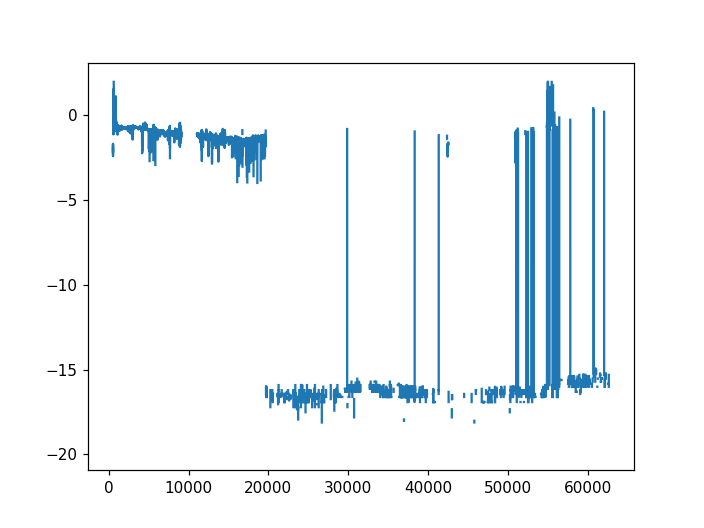

0


<IPython.core.display.Javascript object>


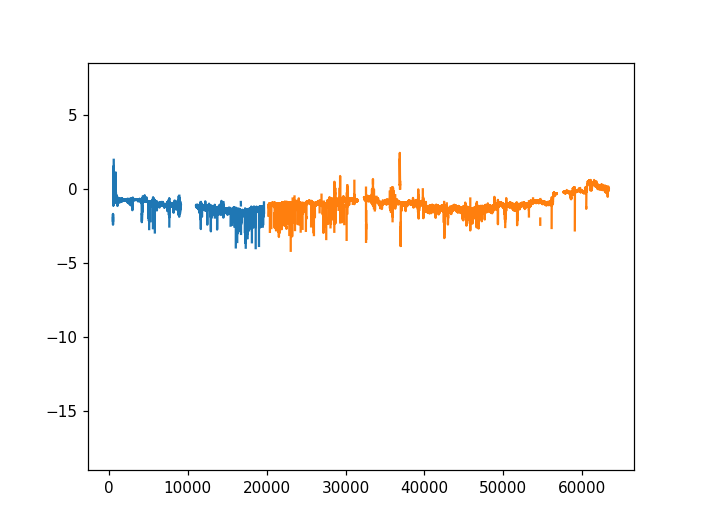

In [48]:
#plt.figure()   # cross-over bias for acs chl estimates

# clean up of acs
# print(sorted(list(acs.keys())))
i2rm = [[19675, 63360]] # start and end index of noisy period 


plt.plot(np.log10(acs['acs_chl']))
    # set values to nan inside the above intervals
for istart,tmp in enumerate(i2rm): 
    print(istart)
    acs['acs_chl'].values[tmp[0]:tmp[1]] = np.nan
    acs['acs_ap'].values[tmp[0]:tmp[1], :] = np.nan
    acs['acs_ap_u'].values[tmp[0]:tmp[1], :] = np.nan
    acs['acs_cp'].values[tmp[0]:tmp[1], :] = np.nan
    acs['acs_cp_u'].values[tmp[0]:tmp[1], :] = np.nan
    acs['acs_bp'].values[tmp[0]:tmp[1], :] = np.nan
    acs['acs_bp_u'].values[tmp[0]:tmp[1], :] = np.nan


#
plt.figure()
plt.plot(np.log10(acs['acs_chl']))
plt.plot(np.log10(acs['ac9_chl']))


/tmp/ipykernel_504353/4259697046.py:5: RuntimeWarning: Mean of empty slice
  acs["acx_chl"] = (['time'], np.nanmean(np.asarray([acs['ac9_chl_adj'].values, acs['acs_chl'].values]), axis=0) )


<IPython.core.display.Javascript object>


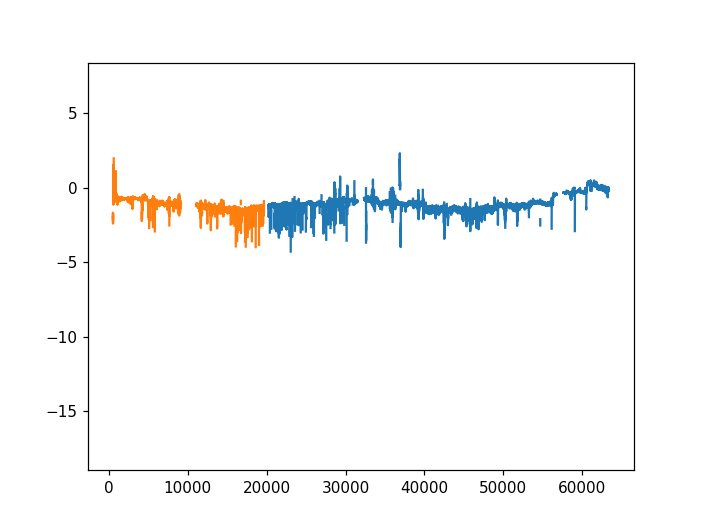

/tmp/ipykernel_504353/4259697046.py:19: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(acs['ac9_chl_adj'].values))
/tmp/ipykernel_504353/4259697046.py:20: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(acs['acs_chl'].values))
/tmp/ipykernel_504353/4259697046.py:20: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(acs['acs_chl'].values))


<IPython.core.display.Javascript object>


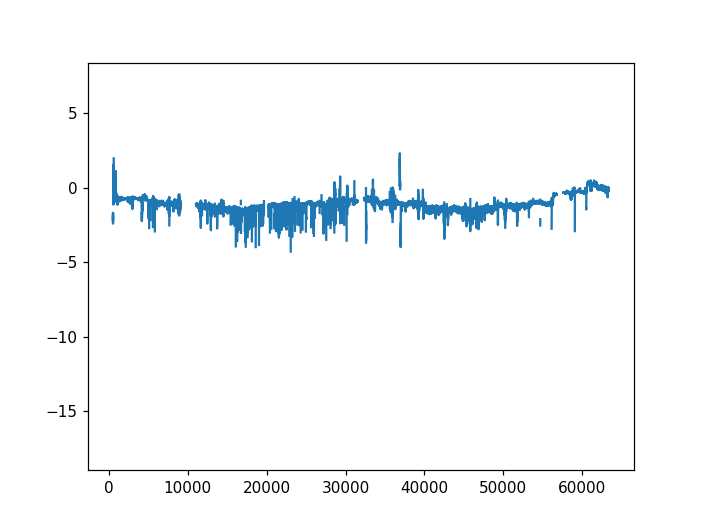

-inf


/tmp/ipykernel_504353/4259697046.py:24: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(acs['acx_chl'].values))
/tmp/ipykernel_504353/4259697046.py:24: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(acs['acx_chl'].values))
/tmp/ipykernel_504353/4259697046.py:26: RuntimeWarning: divide by zero encountered in log10
  print(np.nanmin(np.log10(acs['acx_chl'].values)))
/tmp/ipykernel_504353/4259697046.py:26: RuntimeWarning: invalid value encountered in log10
  print(np.nanmin(np.log10(acs['acx_chl'].values)))


In [49]:
# create acx_chl variable that merges the ac9_chl and acs_chl if available
#plt.figure()
#plt.plot(np.log10(acs['ac9_chl_adj'].values))

acs["acx_chl"] = (['time'], np.nanmean(np.asarray([acs['ac9_chl_adj'].values, acs['acs_chl'].values]), axis=0) )
acs["acx_chl"].attrs = {"acx_chl_units":"mg/m3",
                       "acx_chl_comment":"merged the ac9_chl and acs_chl",
                       }


# plot it
#fig,ax = plt.subplots(2,1, figsize=[13,6])
#ax[0].semilogy(acs.time, acs.acx_chl, 'ro', lw=0.5, ms=5, mfc='none', alpha=0.05)
#ax[0].semilogy(acs.time, acs.acs_chl, '.', lw=0.5, ms=3, mfc='none', alpha=0.15)
#ax[0].semilogy(acs['uway_time'], acs.acs2_chl, 'k.', lw=0.5, ms=0.5, mfc='none', alpha=0.15)
#ax[0].set_ylim([0.001, 5])

plt.figure()
plt.plot(np.log10(acs['ac9_chl_adj'].values))
plt.plot(np.log10(acs['acs_chl'].values))


plt.figure()
plt.plot(np.log10(acs['acx_chl'].values))

print(np.nanmin(np.log10(acs['acx_chl'].values)))
#plt.plot(acs.time)
#plt.plot(acs2.time)
#ax[1].semilogy(np.arange(len(acs.time)), acs.acx_chl, 'ro', lw=0.5, ms=5, mfc='none', alpha=0.15)
#ax[1].semilogy(np.arange(len(acs.time)), acs.acs_chl, '.', lw=0.5, ms=8, mfc='none', alpha=0.15)
#plt.xlim(51700,52000)
#ax[1].semilogy(np.arange(len(acs.time)), acs.ac9_chl_adj, 'k.', lw=0.5, ms=1, mfc='none', alpha=0.15)

In [50]:
#len(acs['acs_chl'])
#len(acs['acs_ap'])
len(acs['acs_ap_u'])

print(list(acs.keys()))

['flow', 'acs_chl', 'acs_ap', 'acs_ap_u', 'acs_bp', 'acs_bp_u', 'acs_cp', 'acs_cp_u', 'acs_N', 'acs2_chl', 'acs2_ap', 'acs2_ap_u', 'acs2_bp', 'acs2_bp_u', 'acs2_cp', 'acs2_cp_u', 'acs2_N', 'ac9_chl', 'ac9_ap', 'ac9_ap_u', 'ac9_bp', 'ac9_bp_u', 'ac9_cp', 'ac9_cp_u', 'ac9_N', 'ac9_chl_adj', 'bb3_bbp', 'bb3_bbp_err', 'bb3_bb02', 'bb3_bb02_err', 'bb3_bbp_corr', 'cstar_cp', 'cstar_cp_err', 'uway_lat', 'uway_lon', 'uway_tsg_temp', 'uway_sst', 'uway_conductivty', 'uway_sal', 'uway_fluo', 'uway_trans', 'uway_air_temp', 'uway_pressure', 'uway_humidty', 'uway_ptir', 'uway_stir', 'uway_ppar', 'uway_spar', 'uway_windspeed', 'uway_winddir', 'hplc_Horn_Point_Lab_sample_code', 'hplc_PI', 'hplc_Original_PI_Sample_Code', 'hplc_Cruise_Name', 'hplc_Sequential_Sample_Number', 'hplc_Indicate_if_filter_is_duplicate', 'hplc_Volume_filtered_(ml)', 'hplc_station', 'hplc_bottle_number', 'hplc_Name_of_Water_Body', 'hplc_Water_Type', 'hplc_collected_with_positive_pressure_or_vaccuum', 'hplc_Year_of_Sample', 'hplc

<>:26: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:26: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?


<IPython.core.display.Javascript object>


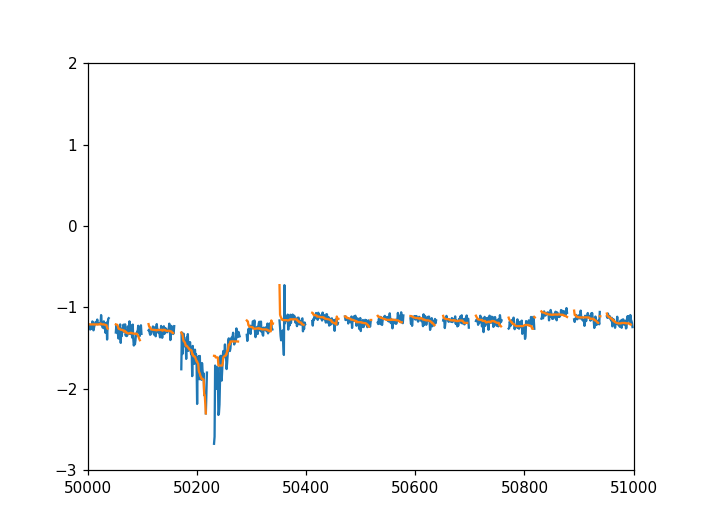

/tmp/ipykernel_504353/1093955202.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(acs['acx_chl'].values))
/tmp/ipykernel_504353/1093955202.py:3: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(acs['acx_chl'].values))
/tmp/ipykernel_504353/1093955202.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(acs_filtered_x['acx_chl'].values))
/tmp/ipykernel_504353/1093955202.py:7: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(acs_filtered_x['acx_chl'].values))
/tmp/ipykernel_504353/1093955202.py:26: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [30180, 30250]


TypeError: list indices must be integers or slices, not tuple

In [51]:
# step x - # filters w.r.t. i2fn (mQ interval + previous manual spike removal) and innan
plt.figure()
plt.plot(np.log10(acs['acx_chl'].values))
ix = xr.DataArray(acs.time, dims=['time']) 
acs_filtered_x = acs.sel(time = ix)
acs_filtered_x['acx_chl'].values = sg.medfilt(acs.acx_chl, kernel_size=31) # apply med filter to acx chl and acx chl debiasesd 
plt.plot(np.log10(acs_filtered_x['acx_chl'].values))
plt.xlim(50000,51000)
plt.ylim(-3,2)

# clean up of acs
# print(sorted(list(acs.keys())))
i2rm = [[550,560],
         [600,625],
         [850,875],# start and end index of noisy period 
         [5570,5580],# start an
         [5640, 5650],
         [7650, 7690],
         [11600, 11670],
         [14500, 14525],
         [16000, 16020],
         [19620, 19670],
         [22980, 23000], 
         [26860, 29000],
         [30120, 30150], 
         [30180, 30250]
         [32570, 32640]
         [35875, 35900]   
         [35950, 35975]   
         [36760, 35975]   
         [39770, 39800]   
         [42450, 42600]   
         [50100, 50300]   
         [56100, 56140]]   
    

    # set values to nan inside the above intervals
for istart,tmp in enumerate(i2rm): 
    print(istart)
    acs['acs_chl'].values[tmp[0]:tmp[1]] = np.nan
    acs['acs_ap'].values[tmp[0]:tmp[1], :] = np.nan
    acs['acs_ap_u'].values[tmp[0]:tmp[1], :] = np.nan
    acs['acs_cp'].values[tmp[0]:tmp[1], :] = np.nan
    acs['acs_cp_u'].values[tmp[0]:tmp[1], :] = np.nan
    acs['acs_bp'].values[tmp[0]:tmp[1], :] = np.nan
    acs['acs_bp_u'].values[tmp[0]:tmp[1], :] = np.nan
    
    acs['ac9_chl'].values[tmp[0]:tmp[1]] = np.nan
    acs['ac9_ap'].values[tmp[0]:tmp[1], :] = np.nan
    acs['ac9_ap_u'].values[tmp[0]:tmp[1], :] = np.nan
    acs['ac9_cp'].values[tmp[0]:tmp[1], :] = np.nan
    acs['ac9_cp_u'].values[tmp[0]:tmp[1], :] = np.nan
    acs['ac9_bp'].values[tmp[0]:tmp[1], :] = np.nan
    acs['ac9_bp_u'].values[tmp[0]:tmp[1], :] = np.nan


plt.figure()
plt.plot(np.log10(acs['acx_chl'].values))
ix = xr.DataArray(acs.time, dims=['time']) 
acs_filtered_x = acs.sel(time = ix)
acs_filtered_x['acx_chl'].values = sg.medfilt(acs.acx_chl, kernel_size=31) # apply med filter to acx chl and acx chl debiasesd 
plt.plot(np.log10(acs_filtered_x['acx_chl'].values))
plt.xlim(60000,65000)
plt.ylim(-3,2)

#


In [52]:
### manually identify (using plot above) noisy parts of the acs_chl timeseries
#i2rm = [[1155, 1165]]# # start and end index of noisy period 1

    


#print(len(i2rm))

#plt.plot(np.log10(acs['acs_chl']))
    # set values to nan inside the above intervals
#for istart,tmp in enumerate(i2rm): 
 #   acs['acx_chl'].values[tmp[0]:tmp[1]] = np.nan
    
  #  acs['acs_chl'].values[tmp[0]:tmp[1]] = np.nan
   # acs['acs_ap'].values[tmp[0]:tmp[1], :] = np.nan
    #acs['acs_ap_u'].values[tmp[0]:tmp[1], :] = np.nan
    #acs['acs_cp'].values[tmp[0]:tmp[1], :] = np.nan
    #acs['acs_cp_u'].values[tmp[0]:tmp[1], :] = np.nan
    #acs['acs_bp'].values[tmp[0]:tmp[1], :] = np.nan
    #acs['acs_bp_u'].values[tmp[0]:tmp[1], :] = np.nan
    
    #acs['ac9_chl_adj'].values[tmp[0]:tmp[1]] = np.nan
    #acs['ac9_chl'].values[tmp[0]:tmp[1]] = np.nan
    #acs['ac9_ap'].values[tmp[0]:tmp[1], :] = np.nan
    #acs['ac9_ap_u'].values[tmp[0]:tmp[1], :] = np.nan
    #acs['ac9_cp'].values[tmp[0]:tmp[1], :] = np.nan
    #acs['ac9_cp_u'].values[tmp[0]:tmp[1], :] = np.nan
    #acs['ac9_bp'].values[tmp[0]:tmp[1], :] = np.nan
    #acs['ac9_bp_u'].values[tmp[0]:tmp[1], :] = np.nan


#
#plt.figure()
#plt.plot(np.log10(acs['acs_chl']))
#plt.plot(np.log10(acs['ac9_chl']))

<IPython.core.display.Javascript object>


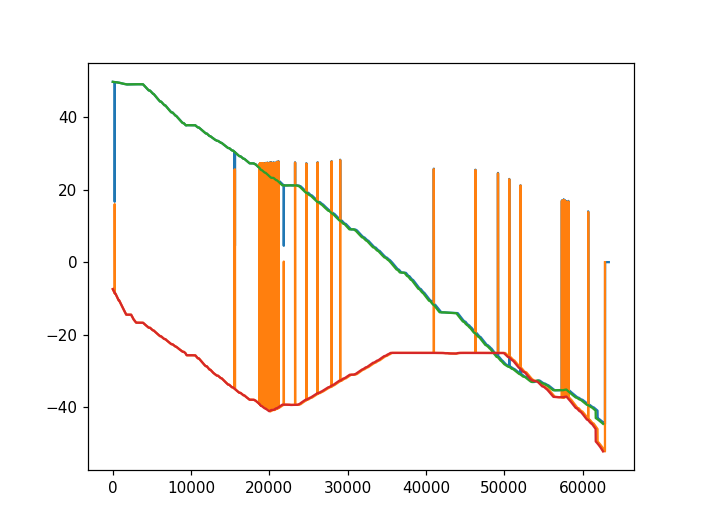

In [53]:
# clean-up anomalous GPS


plt.figure()
plt.plot(acs.uway_lat)
plt.plot(acs.uway_lon)


i2kp = np.where((acs.uway_lon < 0)) [0]
iy = xr.DataArray(acs.time[i2kp], dims=['time']) 
acs = acs.sel(time = iy)

plt.plot(acs.uway_lat)
plt.plot(acs.uway_lon)


<IPython.core.display.Javascript object>


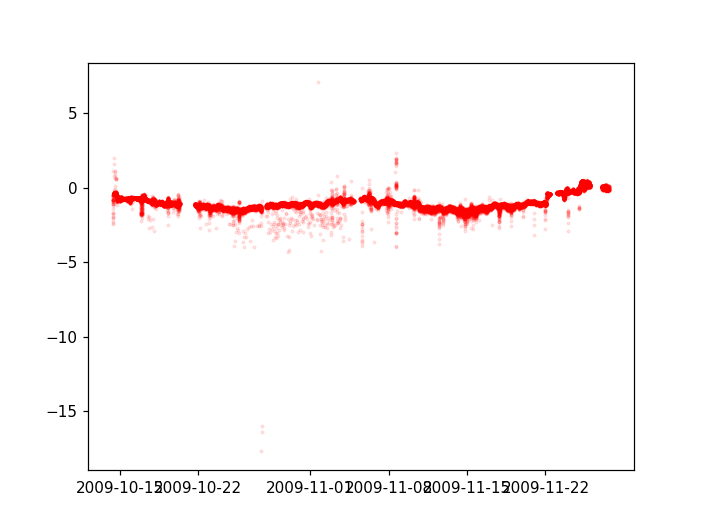

/tmp/ipykernel_504353/3320566300.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(acs.time, np.log10(acs.acx_chl.values), 'r.', lw=0.1, ms=3, mfc='none', alpha=0.15)
/tmp/ipykernel_504353/3320566300.py:2: RuntimeWarning: invalid value encountered in log10
  plt.plot(acs.time, np.log10(acs.acx_chl.values), 'r.', lw=0.1, ms=3, mfc='none', alpha=0.15)


In [54]:
plt.figure()
plt.plot(acs.time, np.log10(acs.acx_chl.values), 'r.', lw=0.1, ms=3, mfc='none', alpha=0.15)

[  536   537   599 ... 52136 52137 52138]
[    0     1     2 ... 62625 62626 62627]
[    0     1     2 ... 62625 62626 62627]


<IPython.core.display.Javascript object>


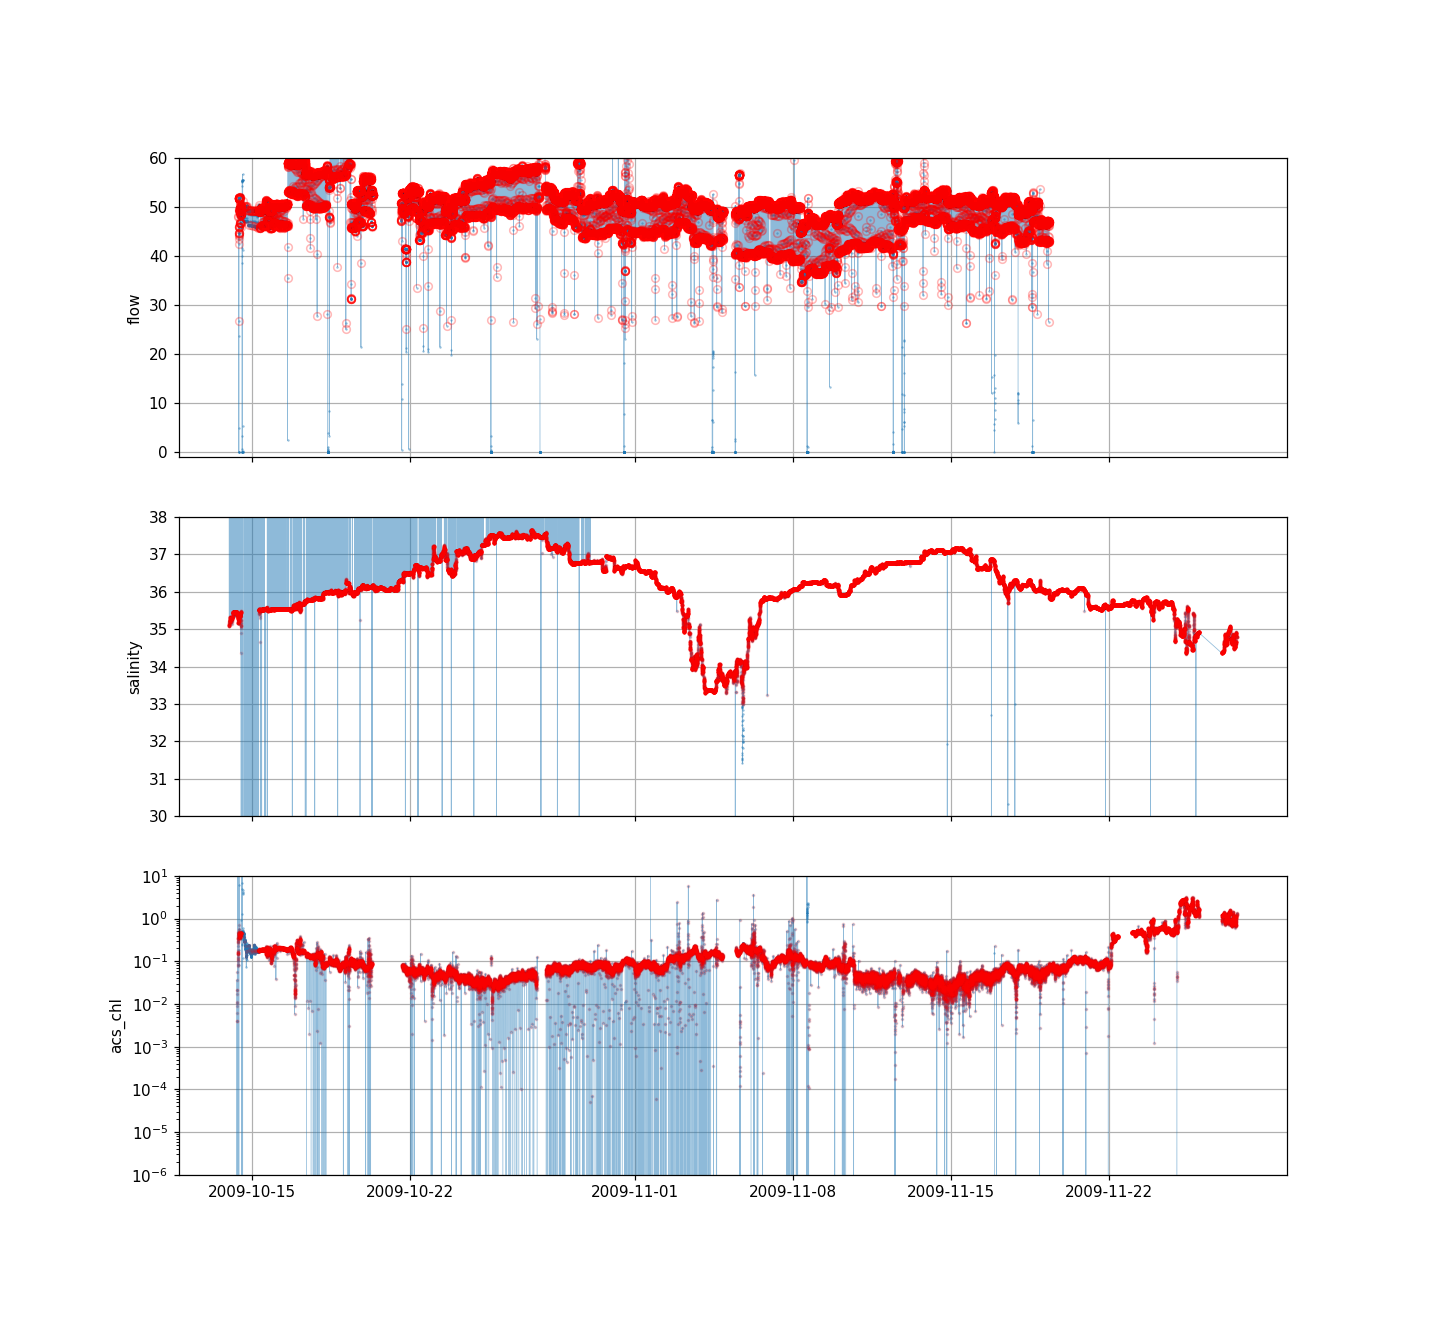

(1e-06, 10)

In [55]:
# filter acs data for MQ and noisy events
MIN_FLOW_RATE = 25
MIN_SAL = 33
MAX_SAL = 50

i2f1 = np.where((acs.uway_sal>MIN_SAL) & (acs.flow>MIN_FLOW_RATE))[0]  
i2f2 = np.where((np.isnan(acs.uway_sal)==True) | (np.isnan(acs.flow)==True))[0]

i2f = np.union1d(i2f1, i2f2)

print(i2f1)
print(i2f2)
print(i2f)

fig, ax = plt.subplots(3,1, figsize=(13, 12), sharex=True)
ax[0].plot(acs.time, acs.flow, '.-', lw=0.5, ms=1, alpha=0.5)
ax[0].plot(acs.time[i2f], acs.flow[i2f], 'ro', lw=0.5, ms=5, mfc='none', alpha=0.15)
ax[0].plot(acs.time[i2f], acs.flow[i2f], 'ro', lw=0.5, ms=5, mfc='none', alpha=0.15)
ax[0].set_ylabel('flow')
ax[0].grid('on')
ax[0].set_ylim([-1, 60])


ax[1].plot(acs.time, acs.uway_sal, '.-', lw=0.5, ms=1, alpha=0.5)
ax[1].plot(acs.time[i2f], acs.uway_sal[i2f], 'r.', lw=0.1, ms=3, mfc='none', alpha=0.15)
ax[1].set_ylabel('salinity')
ax[1].grid('on')
ax[1].set_ylim([30, 38])

ax[2].semilogy(acs.time, acs.acx_chl.values, '.-', lw=0.5, ms=1, alpha=0.5)
ax[2].semilogy(acs.time[i2f], acs.acx_chl[i2f].values, 'r.', lw=0.1, ms=3, mfc='none', alpha=0.15)
ax[2].set_ylabel('acs_chl')
ax[2].grid('on')
plt.ylim([1e-6, 10])

#print(acs.keys())
#print(i2f)
#len(i2f)
#for i in range(len)
 #   print(istart, tmp[0], tmp[1])
  #  acs['acs_chl'].values[tmp[0]:tmp[1]] = np.nan
   # acs['acs_ap'].values[tmp[0]:tmp[1], :] = np.nan
   #acs['acs_ap_u'].values[tmp[0]:tmp[1], :] = np.nan
#for istart,tmp in enumerate(i2f):
 #   print(istart, tmp[0], tmp[1])
  #  acs['acs_chl'].values[tmp[0]:tmp[1]] = np.nan
   # acs['acs_ap'].values[tmp[0]:tmp[1], :] = np.nan
   # acs['acs_ap_u'].values[tmp[0]:tmp[1], :] = np.nan


In [56]:
df_hplc.keys()
#df_hplc_surf.keys()
#list(df_hplc['STATION'])
#f_UND = df_hplc_surfloc[(df_hplc_surf['CTD'] == "UND") & (df_hplc_surf['Bottle'] == "UND")]
#df_CTD = f_hplc_surf.loc[(df_hplc_surf['CTD'] != "UND") & (df_hplc_surf['Bottle'] != "UND")]


Index(['Horn Point Lab sample code', 'PI', 'Original PI Sample Code',
       'Cruise Name', 'Sequential Sample Number',
       'Indicate if filter is duplicate', 'Volume filtered (ml)', 'station',
       'bottle number', 'Name of Water Body', 'Water Type',
       'collected with positive pressure or vaccuum', 'Year of Sample',
       'Gregorian Month', 'Day of Gregorian Month', 'Sequential Day of Year',
       'GMT Time', 'Depth (meters)', 'Longitude', 'Latitude',
       'Filter storage before shipping to HPL', 'Filter type',
       'Filter diameter (mm)', 'date extracted at Horn Point (month/day/year)',
       'Vx (ml)', 'Tot_Chl_a', 'Tot_Chl_b', 'Tot_Chl_c', 'Alpha-beta-Car',
       'But-fuco', 'Hex-fuco', 'Allo', 'Diad', 'Diato', 'Fuco', 'Perid', 'Zea',
       'Chl_a', 'DV_Chl_a', 'Chlide_a', 'Chl_b', 'DV_Chl_b', 'Chl_c2',
       'Chl_c1', 'Chl_c12', 'Chl_c3', 'Lut', 'Neo', 'Viola', 'Phythin_a',
       'Phide_a', 'Pras', 'TChl', 'PPC', 'PSC', 'PSP', 'TCaro', 'TAcc', 'TPig',
       '

<xarray.DataArray 'hplc_time' (hplc_time: 111)>
array(['2009-10-17T14:22:00.000000000', '2009-10-17T14:22:00.000000000',
       '2009-10-17T21:35:00.000000000', '2009-10-18T19:16:00.000000000',
       '2009-10-18T19:16:00.000000000', '2009-10-19T08:46:00.000000000',
       '2009-10-19T20:11:00.000000000', '2009-10-21T20:19:00.000000000',
       '2009-10-21T20:19:00.000000000', '2009-10-22T14:40:00.000000000',
       '2009-10-22T19:45:00.000000000', '2009-10-23T08:14:00.000000000',
       '2009-10-23T08:14:00.000000000', '2009-10-23T20:28:00.000000000',
       '2009-10-24T11:07:00.000000000', '2009-10-24T19:55:00.000000000',
       '2009-10-25T11:21:00.000000000', '2009-10-25T11:21:00.000000000',
       '2009-10-25T20:36:00.000000000', '2009-10-26T14:28:00.000000000',
       '2009-10-26T20:40:00.000000000', '2009-10-27T13:54:00.000000000',
       '2009-10-28T07:31:00.000000000', '2009-10-28T20:37:00.000000000',
       '2009-10-29T07:19:00.000000000', '2009-10-30T08:15:00.000000000',
   

<IPython.core.display.Javascript object>


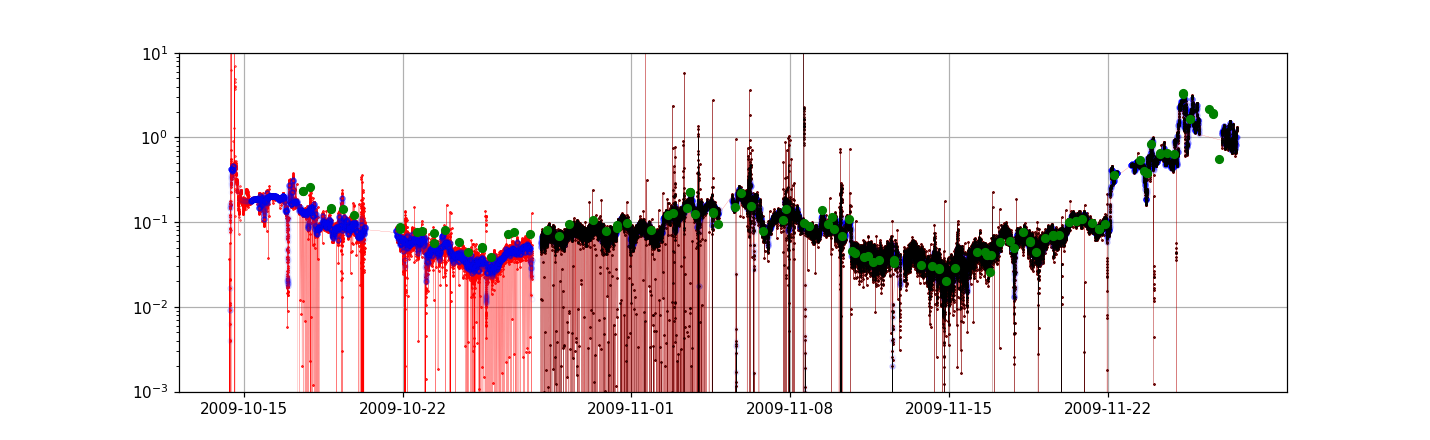

In [57]:
# median filter data
MEDFILT_WIN = 31

print(acs.hplc_time)

innan = np.where(~np.isnan(acs.acx_chl[i2f]))[0] # need to remove nans to prevent medfilt to be spiky near edges

fig2, ax2 = plt.subplots(1, figsize=(13, 4))
ax2.semilogy(acs.time, acs.acx_chl, 'r.-', lw=0.1, ms=1, mfc='none')
ax2.semilogy(acs.time[i2f][innan], acs.acx_chl[i2f][innan], 'r.-', lw=0.1, ms=1, mfc='none')
ax2.semilogy(acs.time[i2f][innan], sg.medfilt(acs.acx_chl[i2f][innan], kernel_size=MEDFILT_WIN), 'bo', lw=1, ms=3, mfc='none', alpha = 0.05)
ax2.semilogy(acs.time, acs.ac9_chl_adj, 'k.-', lw=0.1, ms=1, mfc='none')
ax2.grid('on')
plt.ylim([1e-3, 10])




#len(df_CTD.Tot_Chl_a)
#len(df_UND.Tot_Chl_a)

# acs chl needs re-defining here
#acs['acx_chl'] = sg.medfilt(acs.acx_chl[i2f][innan], kernel_size=MEDFILT_WIN


#innan = np.where(~np.isnan(acs.acs_chl[i2f]))[0] # need to remove nans to prevent medfilt to be spiky near edges
#innan2 = np.where(~np.isnan(acs.acs2_chl[i2f]))[0] # need to remove nans to prevent medfilt to be spiky near edges

#fig2, ax2 = plt.subplots(1, figsize=(13, 4))
#ax2.semilogy(acs.time[i2f][innan], acs.acs_chl[i2f][innan], 'r.-', lw=0.1, ms=1, mfc='none')
#ax2.semilogy(acs.time[i2f][innan], sg.medfilt(acs.acs_chl[i2f][innan], kernel_size=MEDFILT_WIN), 'bo', lw=1, ms=2, mfc='none', alpha = 0.5, label='ACS: med filt')
#ax2.semilogy(acs.time[i2f][innan2], acs.acs2_chl[i2f][innan2], 'k.-', lw=0.1, ms=1, mfc='none')
#ax2.semilogy(acs.time[i2f][innan2], sg.medfilt(acs.acs2_chl[i2f][innan2], kernel_size=MEDFILT_WIN), 'bo',color='orange', lw=1, ms=1, mfc='none', alpha = 0.5, label='ACS2: med filt')
#ax2.grid('on')
#plt.legend()
#plt.ylim([1e-3, 10])


#print(list(acs.keys()))
ax2.semilogy(acs.hplc_time, acs.hplc_Tot_Chl_a, 'go', ms=5, alpha=1)#, mfc='none')
#a2.semilogy(df_CTD.index, df_CTD.Tot_Chl_a, 'ko', ms=7, alpha=1, mfc='none', zorder=60)
#ax2.scatter(df_CTD.index, df_CTD.Tot_Chl_a, c=df_CTD.Bottle.values, s=30, alpha=1, zorder=60, cmap = plt.get_cmap('inferno'), vmin=2, vmax=24)
#ax2.semilogy(df_UND.index, df_UND.Tot_Chl_a, 'ks', ms=7, alpha=0.85, mfc='c')

#########


In [58]:
# compare lat and lon of hplc and acs datasets
#fig, ax = plt.subplots(2, 1, figsize = (14, 8), sharex = True)

#ax[0].plot(acs.time, acs.uway_lat, '.', ms = 1, mfc = 'none')
##ax[0].plot(acs.hplc_time, acs.hplc_lat, 'ro', ms = 4, mfc = 'none', alpha = 0.5)
#ax[0].set_ylabel("latitude")
#ax[1].plot(acs.time, acs.uway_lon, '.', ms = 1, mfc = 'none')
#ax[1].plot(acs.hplc_time, acs.hplc_lon, 'ro', ms = 4, mfc = 'none', alpha = 0.5)
#ax[1].set_ylabel("longitude")
df_hplc_surf.keys()

Index(['Horn Point Lab sample code', 'PI', 'Original PI Sample Code',
       'Cruise Name', 'Sequential Sample Number',
       'Indicate if filter is duplicate', 'Volume filtered (ml)', 'station',
       'bottle number', 'Name of Water Body', 'Water Type',
       'collected with positive pressure or vaccuum', 'Year of Sample',
       'Gregorian Month', 'Day of Gregorian Month', 'Sequential Day of Year',
       'GMT Time', 'Depth (meters)', 'lon', 'lat',
       'Filter storage before shipping to HPL', 'Filter type',
       'Filter diameter (mm)', 'date extracted at Horn Point (month/day/year)',
       'Vx (ml)', 'Tot_Chl_a', 'Tot_Chl_b', 'Tot_Chl_c', 'Alpha-beta-Car',
       'But-fuco', 'Hex-fuco', 'Allo', 'Diad', 'Diato', 'Fuco', 'Perid', 'Zea',
       'Chl_a', 'DV_Chl_a', 'Chlide_a', 'Chl_b', 'DV_Chl_b', 'Chl_c2',
       'Chl_c1', 'Chl_c12', 'Chl_c3', 'Lut', 'Neo', 'Viola', 'Phythin_a',
       'Phide_a', 'Pras', 'TChl', 'PPC', 'PSC', 'PSP', 'TCaro', 'TAcc', 'TPig',
       'DP', 'comme

In [59]:
sorted(acs.keys())

['ac9_N',
 'ac9_ap',
 'ac9_ap_u',
 'ac9_bp',
 'ac9_bp_u',
 'ac9_chl',
 'ac9_chl_adj',
 'ac9_cp',
 'ac9_cp_u',
 'acs2_N',
 'acs2_ap',
 'acs2_ap_u',
 'acs2_bp',
 'acs2_bp_u',
 'acs2_chl',
 'acs2_cp',
 'acs2_cp_u',
 'acs_N',
 'acs_ap',
 'acs_ap_u',
 'acs_bp',
 'acs_bp_u',
 'acs_chl',
 'acs_cp',
 'acs_cp_u',
 'acx_chl',
 'bb3_bb02',
 'bb3_bb02_err',
 'bb3_bbp',
 'bb3_bbp_corr',
 'bb3_bbp_err',
 'cstar_cp',
 'cstar_cp_err',
 'flow',
 'hplc_Allo',
 'hplc_Alpha-beta-Car',
 'hplc_But-fuco',
 'hplc_Chl_a',
 'hplc_Chl_b',
 'hplc_Chl_c1',
 'hplc_Chl_c12',
 'hplc_Chl_c2',
 'hplc_Chl_c3',
 'hplc_Chlide_a',
 'hplc_Cruise_Name',
 'hplc_DP',
 'hplc_DV_Chl_a',
 'hplc_DV_Chl_b',
 'hplc_Day_of_Gregorian_Month',
 'hplc_Depth_(meters)',
 'hplc_Diad',
 'hplc_Diato',
 'hplc_Filter_diameter',
 'hplc_Filter_storage_before_shipping_to_HPL',
 'hplc_Filter_type',
 'hplc_Fuco',
 'hplc_GMT_Time',
 'hplc_Gregorian_Month',
 'hplc_Hex-fuco',
 'hplc_Horn_Point_Lab_sample_code',
 'hplc_Indicate_if_filter_is_duplicate',


In [60]:
# df_CTD.keys()
# print(df_hplc_acs)
#df_hplc_combined['Tot_Chl_a'][0:14]= df_hplc_acs['Tot_Chl_a'][0:14]

print(df_hplc_surf.keys())

Index(['Horn Point Lab sample code', 'PI', 'Original PI Sample Code',
       'Cruise Name', 'Sequential Sample Number',
       'Indicate if filter is duplicate', 'Volume filtered (ml)', 'station',
       'bottle number', 'Name of Water Body', 'Water Type',
       'collected with positive pressure or vaccuum', 'Year of Sample',
       'Gregorian Month', 'Day of Gregorian Month', 'Sequential Day of Year',
       'GMT Time', 'Depth (meters)', 'lon', 'lat',
       'Filter storage before shipping to HPL', 'Filter type',
       'Filter diameter (mm)', 'date extracted at Horn Point (month/day/year)',
       'Vx (ml)', 'Tot_Chl_a', 'Tot_Chl_b', 'Tot_Chl_c', 'Alpha-beta-Car',
       'But-fuco', 'Hex-fuco', 'Allo', 'Diad', 'Diato', 'Fuco', 'Perid', 'Zea',
       'Chl_a', 'DV_Chl_a', 'Chlide_a', 'Chl_b', 'DV_Chl_b', 'Chl_c2',
       'Chl_c1', 'Chl_c12', 'Chl_c3', 'Lut', 'Neo', 'Viola', 'Phythin_a',
       'Phide_a', 'Pras', 'TChl', 'PPC', 'PSC', 'PSP', 'TCaro', 'TAcc', 'TPig',
       'DP', 'comme

<IPython.core.display.Javascript object>


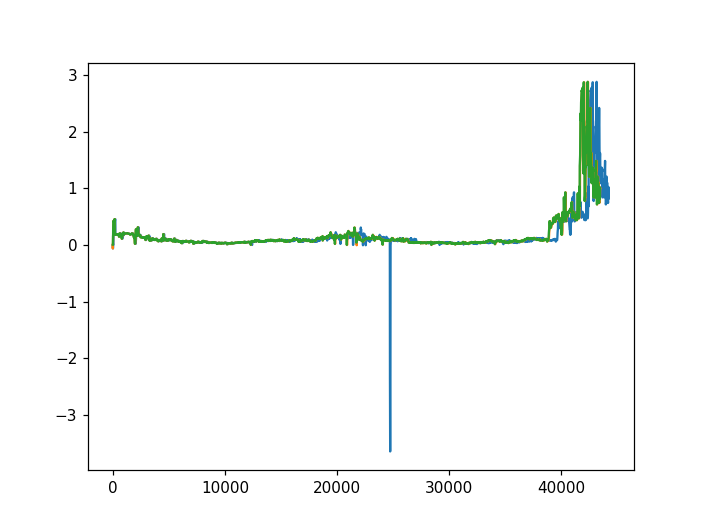

In [61]:

#
plt.figure()
ix = xr.DataArray(acs.time[i2f][innan], dims=['time']) 
acs_filtered_x = acs.sel(time = ix)
acs_filtered_x['acx_chl'].values = sg.medfilt(acs.acx_chl[i2f][innan], kernel_size=31) # apply med filter to acx chl and acx chl debiasesd 
plt.plot(acs_filtered_x['acx_chl'].values)


#step y - # filters w.r.t. ap (10the element) being > 0
i2kp = np.where(np.logical_or(acs_filtered_x.acs_ap[:,10] > 0,acs_filtered_x.ac9_ap[:,0] >0))[0]
iy = xr.DataArray(acs_filtered_x.time[i2kp], dims=['time']) 
acs_filtered_xy = acs_filtered_x.sel(time = iy)
plt.plot(acs_filtered_xy['acx_chl'].values)

# step z - # filters w.r.t. acs chl being > 0
i2kp = np.where((acs_filtered_xy.acx_chl[:] > 0)) [0]
iz = xr.DataArray(acs_filtered_xy.time[i2kp], dims=['time']) 
acs_filtered_xyz = acs_filtered_xy.sel(time = iz)
plt.plot(acs_filtered_xyz['acx_chl'].values)


In [62]:
#print(df_hplc_surf['time'])
print(len(acs_filtered_xyz['time']))

43437


In [63]:
# merge HPLC and ACS data
# see https://stackoverflow.com/questions/26517125/combine-two-pandas-dataframes-resample-on-one-time-column-interpolate
########################################################################################################################

#df_hplc_surf_new = df_hplc_surf

#print(len(df_hplc_surf_new))
# merge HPCL and ACS data
# see https://stackoverflow.com/questions/26517125/combine-two-pandas-dataframes-resample-on-one-time-column-interpolate
# here made with dataframe instead of series

# averages duplicate values THIS  ACCOUNTS FOR REPLICATES (IF PRESENT)
#df_hplc_surf_new = df_hplc_surf_new.groupby('time').mean() 

# create pandas series with medfilt ACS data
#df_acs = pd.Series(sg.medfilt(acs.acx_chl[i2f][innan], kernel_size=31), index = acs.time.values[i2f][innan])

#df_hplc_acs = pd.DataFrame({'Tot_Chl_a': df_hplc_surf_new.Tot_Chl_a, 'acs_chl': df_acs})
#
#df_hplc_acs = df_hplc_acs.interpolate('index').reindex(df_hplc_surf_new.index)
#df_hplc_acs.iloc[38,0]=np.nan # remove values that were extrapolated
#df_hplc_acs.iloc[38,1]=np.nan
#df_hplc_acs.iloc[89,0]=np.nan
#df_hplc_acs.iloc[89,1]=np.nan
#df_hplc_acs.iloc[90,0]=np.nan
#df_hplc_acs.iloc[90,1]=np.nan
#df_hplc_acs.iloc[88,0]=np.nan
#df_hplc_acs.iloc[88,1]=np.nan
#len(df_hplc_acs.values)

In [64]:
df_hplc_surf_new =  df_hplc_surf
# merge HPCL and ACS data
# see https://stackoverflow.com/questions/26517125/combine-two-pandas-dataframes-resample-on-one-time-column-interpolate
# here made with dataframe instead of series

# averages duplicate values
df_hplc_surf_new = df_hplc_surf_new.groupby('time').mean() 

# create pandas series with medfilt ACS data
df_acs = pd.Series(sg.medfilt(acs_filtered_xyz.acx_chl, kernel_size=31), index = acs_filtered_xyz.time.values)
df_hplc_acs = pd.DataFrame({'Tot_Chl_a': df_hplc_surf_new.Tot_Chl_a, 'acs_chl': df_acs})

df_hplc_acs = df_hplc_acs.interpolate('index',limit = 1).df_hplc_acs = df_hplc_acs.interpolate('index',limit = 1).reindex(df_hplc_surf_new.index,method='nearest',tolerance='30min')


#type(df_hplc_

/tmp/ipykernel_504353/4107316812.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hplc_surf_new = df_hplc_surf_new.groupby('time').mean()
/tmp/ipykernel_504353/4107316812.py:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_hplc_acs = df_hplc_acs.interpolate('index',limit = 1).df_hplc_acs = df_hplc_acs.interpolate('index',limit = 1).reindex(df_hplc_surf_new.index,method='nearest',tolerance='30min')


In [65]:
#df_hplc_surf_new = df_hplc_surf
# merge HPCL and ACS data
# see https://stackoverflow.com/questions/26517125/combine-two-pandas-dataframes-resample-on-one-time-column-interpolate
# here made with dataframe instead of series

# averages duplicate values
#df_hplc_surf_new = df_hplc_surf_new.groupby('time').mean() 

# create pandas series with medfilt ACS data
#df_acs = pd.Series(sg.medfilt(acs.acs_chl[i2f][innan], kernel_size=31), index = acs.time.values[i2f][innan])
#df_hplc_acs = pd.DataFrame({'Tot_Chl_a': df_hplc_surf_new.Tot_Chl_a, 'acs_chl': df_acs})
#df_hplc_acs = df_hplc_acs.interpolate('index').reindex(df_hplc_surf_new.index)
    


In [66]:
# compute residuals and stats (lin and log space)
rres = df_hplc_acs.acs_chl.values / df_hplc_acs.Tot_Chl_a.values - 1

rres_log = np.log10(df_hplc_acs.acs_chl.values) / np.log10(df_hplc_acs.Tot_Chl_a.values) - 1

delta = np.nanmedian(rres)
delta_log = np.nanmedian(rres_log)
sigma = prcrng(rres)
sigma_log = prcrng(rres_log)
N = np.sum(~np.isnan(rres))

print(delta, sigma, N)

print(delta_log, sigma_log, N)

-0.06574586596751397 0.16713398774166438 89
0.03220072029458465 0.08329987900349682 89


<IPython.core.display.Javascript object>


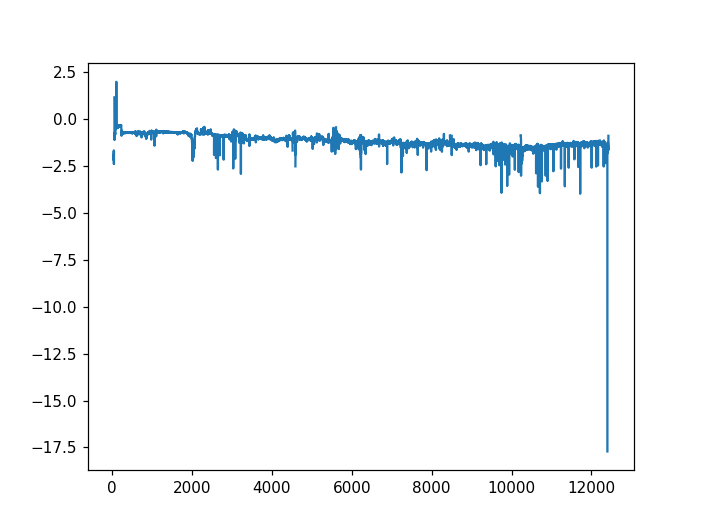

/local1/data/scratch/rsg/tjor/anaconda3/envs/monocle_test_hsp/lib/python3.8/site-packages/xarray/core/computation.py:771: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/local1/data/scratch/rsg/tjor/anaconda3/envs/monocle_test_hsp/lib/python3.8/site-packages/xarray/core/computation.py:771: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


In [67]:
plt.figure()
plt.plot(np.log10(acs.acs_chl[i2f][innan]))



<IPython.core.display.Javascript object>


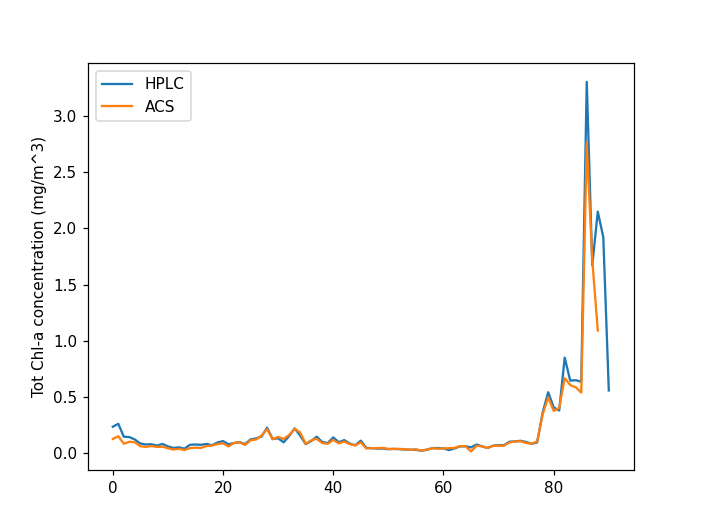

<xarray.DataArray 'time' (time: 62628)>
array(['2009-10-14T00:00:00.000000000', '2009-10-14T00:00:59.999996416',
       '2009-10-14T00:02:00.000002816', ..., '2009-11-27T15:47:59.999999232',
       '2009-11-27T15:48:59.999995648', '2009-11-27T15:50:00.000002304'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2009-10-14 ... 2009-11-27T15:50:00.000002304
Attributes:
    time zone:  UTC

In [68]:
plt.figure()
plt.plot(df_hplc_acs.Tot_Chl_a.values,label='HPLC')
plt.plot(df_hplc_acs.acs_chl.values,label='ACS')
plt.ylabel('Tot Chl-a concentration (mg/m^3)')
#plt.xlabel('Sample index')
plt.legend()

acs.time



<IPython.core.display.Javascript object>


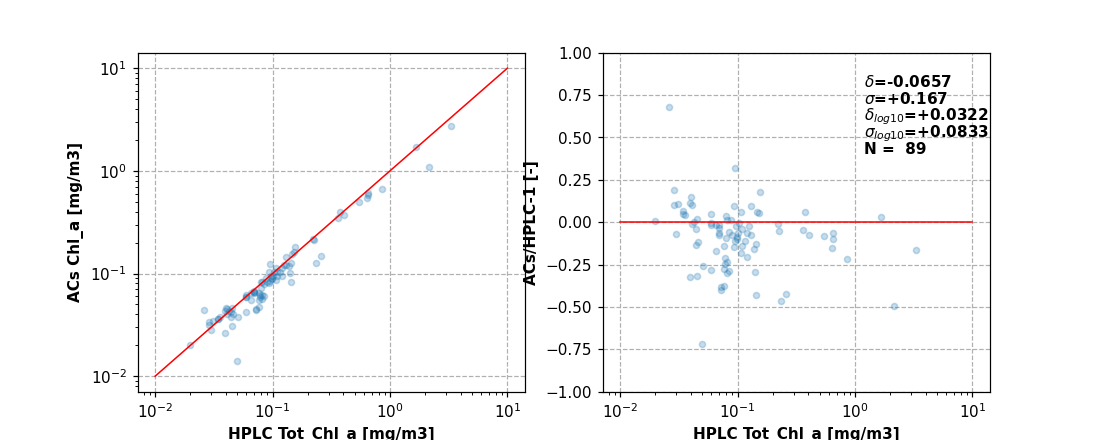

[0.234      0.26       0.145      0.142      0.12       0.0845
 0.076      0.078      0.066      0.081      0.059      0.045
 0.0505     0.039      0.073      0.076      0.073      0.081
 0.069      0.094      0.106      0.078      0.0885     0.097
 0.08       0.121      0.13       0.147      0.2255     0.125
 0.131      0.095      0.152      0.219      0.155      0.079
 0.107      0.145      0.098      0.089      0.139      0.096
 0.115      0.084      0.069      0.11       0.046      0.043
 0.039      0.04       0.034      0.036      0.0345     0.031
 0.03       0.0285     0.02       0.029      0.044      0.044
 0.041      0.026      0.041      0.059      0.06       0.05
 0.076      0.0595     0.045      0.065      0.06933333 0.07
 0.101      0.1035     0.109      0.098      0.082      0.094
 0.361      0.541      0.407      0.3785     0.849      0.6445
 0.648      0.635      3.3045     1.671      2.149      1.922
 0.557     ]


In [69]:


fig, ax = plt.subplots(1,2, figsize=(10, 4))

ax[0].loglog(df_hplc_acs.Tot_Chl_a.values, df_hplc_acs.acs_chl.values, 'o', ms=4, alpha=0.25)
x = np.logspace(np.log10(0.01), np.log10(10), 100)
ax[0].loglog(x, x, 'r-', lw=1)
ax[0].grid('on', ls='--')
ax[0].set_xlabel('HPLC Tot_Chl_a [mg/m3]', fontweight='bold')
ax[0].set_ylabel('ACs Chl_a [mg/m3]', fontweight='bold')

ax[1].semilogx(df_hplc_acs.Tot_Chl_a.values, rres, 'o', ms=4, alpha=0.25)
ax[1].semilogx(x, x*0, 'r-', lw=1)
ax[1].grid('on', ls='--')
ax[1].set_xlabel('HPLC Tot_Chl_a [mg/m3]', fontweight='bold')
ax[1].set_ylabel('ACs/HPLC-1 [-]', fontweight='bold')
ax[1].set_ylim([-1, 1])
ax[1].text(1.2, 0.8, r'$\delta$='+f'{delta:+0.3}', fontweight='bold')
ax[1].text(1.2, 0.7, r'$\sigma$='+f'{sigma:+0.3}', fontweight='bold')
ax[1].text(1.2, 0.6, r'$\delta_{log10}$='+f'{delta_log:+0.3}', fontweight='bold')
ax[1].text(1.2, 0.5, r'$\sigma_{log10}$='+f'{sigma_log:+0.3}', fontweight='bold')
ax[1].text(1.2, 0.4, f'N = {N: 0}', fontweight='bold')




print(df_hplc_acs.Tot_Chl_a.values)



In [70]:
#fig, ax = plt.subplots(1,2, figsize=(10, 4))
#
#ax[0].loglog(Tot_chl_combined, acs_combined, 'o', ms=4, alpha=0.25)
#x = np.logspace(np.log10(0.01), np.log10(10), 100)
#ax[0].loglog(x, x, 'r-', lw=1)
#ax[0].grid('on', ls='--')
#ax[0].set_xlabel('HPLC Tot_Chl_a [mg/m3]', fontweight='bold')
#ax[0].set_ylabel('ACs Chl_a [mg/m3]', fontweight='bold')

#ax[1].semilogx(Tot_chl_combined, rres3, 'o', ms=4, alpha=0.25)
#ax[1].semilogx(x, x*0, 'r-', lw=1)
#ax[1].grid('on', ls='--')
#ax[1].set_xlabel('HPLC Tot_Chl_a [mg/m3]', fontweight='bold')
#ax[1].set_ylabel('ACs/HPLC-1 [-]', fontweight='bold')
#ax[1].set_ylim([-1, 1])
#ax[1].text(2, 0.8, r'$\delta$='+f'{delta3:+0.3}', fontweight='bold')
#ax[1].text(2, 0.7, r'$\sigma$='+f'{sigma3: 0.3}', fontweight='bold')
#ax[1].text(2, 0.6, f'N = {N3: 0}', fontweight='bold')



In [71]:
#fig, ax = plt.subplots(1,1, figsize=(13, 4))
#ax.semilogx(df_hplc_acs.index.values, rres, 'o', ms=10, alpha=0.25, zorder=60)#
#ax.plot(df_hplc_acs.index.values, rres*0, 'k-', lw=2, zorder=1)
#ax.grid('on', ls='--')
#ax.set_ylim([-1, 1])

In [72]:
#####################################################################################
# creat lat-lon coordianets for hplc data - first need to interpolate to the u_way

 # note - IN GENERAL THIS IS NOT NEEDED
    
#ds_hplc_surf = pd.Series(df_hplc_surf.Tot_Chl_a.values, index = df_hplc_surf.index)
#ds_hplc_surf = ds_hplc_surf.groupby('time').mean() # note - time field sometimes called date?

# averages duplicate values

#df_lat = pd.Series(acs.uway_lat, index = acs.time.values)
#df_lon = pd.Series(acs.uway_lon, index = acs.time.values)
#
#df_hplc_coords = pd.DataFrame({'Tot_Chl_a': ds_hplc_surf, 'hplc_lat': df_lat, 'hplc_long': df_lon })


#df_hplc_coords = df_hplc_coords.interpolate().reindex(ds_hplc_surf.index)


#_attrs = {}
#_var = (['hplc_time'],df_hplc_coords['hplc_lat']) 
#acs['hplc_lat'] = _var
#acs['hplc_lat'].attrs = _attrs

#_attrs = {}                                                                    
#_var = (['hplc_time'],df_hplc_coords['hplc_lon']) 
#acs['hplc_lon'] = _var
#acs['hplc_lon'].attrs = _attrs

In [73]:
#ilrg_rres = np.where(abs(rres)>0.5)[0]
#print(rres[ilrg_rres])
#df_hplc_surf_new.iloc[ilrg_rres]

In [74]:
#df_hplc_surf_new.iloc[ilrg_rres].index.dayofyear
# tt.tm_yday

In [75]:
#df_hplc_surf_new.iloc[ilrg_rres].keys()

In [76]:
# find dates of large rres
r = df_hplc_acs.acs_chl / df_hplc_acs.Tot_Chl_a - 1
ii = np.where(abs(r)>0.4)[0]
print(r[ii])
# iss = 2
# [df_hplc_acs.Tot_Chl_a[ii][iss], df_hplc_acs.acx_chl[ii][iss]]

time
2009-10-17 14:22:00   -0.463493
2009-10-17 21:35:00   -0.425172
2009-10-18 19:16:00   -0.429075
2009-11-16 19:56:00    0.681243
2009-11-17 20:49:00   -0.719183
2009-11-26 10:11:00   -0.492606
dtype: float64


In [77]:
# # de-bias ACS-chl following eq 3 in Graban et al., 2020 (https://doi.org/10.1364/OE.397863)
# df_hplc_acs.acs_chl_debiased = df_hplc_acs.acs_chl*(1-delta)

In [78]:
# # compute resuduals and stats
# rres = df_hplc_acs.acs_chl_debiased.values/df_hplc_acs.Tot_Chl_a.values-1

# delta = np.nanmedian(rres)
# sigma = prcrng(rres)
# N = len(rres)

# print(delta, sigma, N)

In [79]:
# fit data to power law -- not useD?
from scipy.optimize import curve_fit

def func(x, a, b):
    return a * x**b

print(df_hplc_acs.acs_chl.values[np.isnan(df_hplc_acs.acs_chl)==0])

popt, pcov = curve_fit(func, 0.014*df_hplc_acs.acs_chl.values[np.isnan(df_hplc_acs.acs_chl)==0] , df_hplc_acs.Tot_Chl_a.values[np.isnan(df_hplc_acs.acs_chl)==0])

perr = np.sqrt(np.diag(pcov)) # parameter uncertainty 

print("chl_HPLC = a * chl_ACS^b " )

print("a = " + f'{popt[0]:.1f} ' + "+/- " + f'{perr[0]:.1f}' )
print("b = " + f'{popt[1]:.3f} ' + "+/- " + f'{perr[1]:.3f}' )


[0.12554257 0.14945521 0.08278417 0.10023125 0.09543838 0.05996751
 0.05495484 0.06152074 0.05462837 0.05663971 0.04240433 0.03071353
 0.03736355 0.02637383 0.04382448 0.04748547 0.04527256 0.06219948
 0.06646813 0.08049711 0.08653175 0.05865374 0.08974008 0.0948915
 0.07239784 0.11304475 0.12052523 0.15566783 0.2131418  0.12228784
 0.14366872 0.12512426 0.1605447  0.21608941 0.18283651 0.08192938
 0.11330429 0.1261613  0.08826672 0.08227759 0.11720739 0.08546431
 0.10252573 0.07912513 0.06766204 0.09473524 0.04051081 0.04298184
 0.04340519 0.0458801  0.03630866 0.03746452 0.03611406 0.03439726
 0.02796816 0.03387766 0.02015596 0.03188027 0.04210592 0.03813862
 0.04045726 0.04371231 0.04512547 0.06181968 0.05956674 0.01404083
 0.06512708 0.05848586 0.04575433 0.06393196 0.06397787 0.06552276
 0.09444615 0.10279502 0.10431216 0.08954463 0.08309725 0.10281154
 0.34369911 0.49579345 0.37536577 0.40079997 0.66581664 0.60523562
 0.5853844  0.53850309 2.76059153 1.72025349 1.09038927]
chl_HP

In [80]:
# as previous but apply log transform prior to fitting
import scipy

linear_mod = scipy.stats.linregress(np.log10(0.014*df_hplc_acs.acs_chl.values[np.isnan(df_hplc_acs.acs_chl)==0]), np.log10(df_hplc_acs.Tot_Chl_a.values[np.isnan(df_hplc_acs.acs_chl)==0]))


print(df_hplc_acs.acs_chl.values)
print(df_hplc_acs.Tot_Chl_a.values)

A = np.round(100*linear_mod.intercept)/100
B = np.round(1000*linear_mod.slope)/1000
r_sq = np.round(1000*linear_mod.rvalue**2)/100

r_sq = np.round(1000*linear_mod.rvalue**2)/1000
stderr = np.round(1000*linear_mod.stderr)/1000
interr = np.round(1000*linear_mod.intercept_stderr)/1000


print('A = ' + str(10**A) + ' +/- ' + str(2*10**interr))
print('B = ' + str(B) + ' +/- ' + str(2*stderr))

print(r_sq)


[0.12554257 0.14945521 0.08278417 0.10023125 0.09543838 0.05996751
 0.05495484 0.06152074 0.05462837 0.05663971 0.04240433 0.03071353
 0.03736355 0.02637383 0.04382448 0.04748547 0.04527256 0.06219948
 0.06646813 0.08049711 0.08653175 0.05865374 0.08974008 0.0948915
 0.07239784 0.11304475 0.12052523 0.15566783 0.2131418  0.12228784
 0.14366872 0.12512426 0.1605447  0.21608941 0.18283651 0.08192938
 0.11330429 0.1261613  0.08826672 0.08227759 0.11720739 0.08546431
 0.10252573 0.07912513 0.06766204 0.09473524 0.04051081 0.04298184
 0.04340519 0.0458801  0.03630866 0.03746452 0.03611406 0.03439726
 0.02796816 0.03387766 0.02015596 0.03188027 0.04210592 0.03813862
 0.04045726 0.04371231 0.04512547 0.06181968 0.05956674 0.01404083
 0.06512708 0.05848586 0.04575433 0.06393196 0.06397787 0.06552276
 0.09444615 0.10279502 0.10431216 0.08954463 0.08309725 0.10281154
 0.34369911 0.49579345 0.37536577 0.40079997 0.66581664 0.60523562
 0.5853844  0.53850309 2.76059153 1.72025349 1.09038927        

In [81]:
# fig, ax = plt.subplots(1,2, figsize=(10, 4))

# ax[0].loglog(df_hplc_acs.Tot_Chl_a.values, df_hplc_acs.acs_chl_debiased.values, 'o', ms=4, alpha=0.25)
# x = np.logspace(np.log10(0.01), np.log10(10), 100)
# ax[0].loglog(x, x, 'r-', lw=1)
# ax[0].grid('on', ls='--')
# ax[0].set_xlabel('HPLC Tot_Chl_a [mg/m3]', fontweight='bold')
# ax[0].set_ylabel('ACS Chl_a [mg/m3]', fontweight='bold')

# ax[1].semilogx(df_hplc_acs.Tot_Chl_a.values, rres, 'o', ms=4, alpha=0.25)
# ax[1].semilogx(x, x*0, 'r-', lw=1)
# ax[1].grid('on', ls='--')
# ax[1].set_xlabel('HPLC Tot_Chl_a [mg/m3]', fontweight='bold')
# ax[1].set_ylabel('ACS/HPLC-1 [-]', fontweight='bold')

# ax[1].text(2, 0.8, r'$\delta$='+f'{delta:+0.3}', fontweight='bold')
# ax[1].text(2, 0.7, r'$\sigma$='+f'{sigma: 0.3}', fontweight='bold')
# ax[1].text(2, 0.6, f'N = {N: 0}', fontweight='bold')


In [82]:
# de-bias ACS-chl following eq 3 in Graban et al., 2020 (https://doi.org/10.1364/OE.397863)

# de-bias ACS-chl following eq 3 in Graban et al., 2020 (https://doi.org/10.1364/OE.397863)
innan = np.where(~np.isnan(acs.acx_chl[i2f]))[0]
acs['acx_chl_debiased'] = acs.acx_chl*(1-delta)
# acs['acs_chl_debiased'] = acs.acs_chl*(1-delta)
acs_out = pd.DataFrame(data = {'lat [degN]': acs.uway_lat[i2f][innan],
                               'lon [degE]': acs.uway_lon[i2f][innan],
                               'acs_chl_debiased [mg_m3]': acs.acx_chl_debiased[i2f][innan]
                              }  ,
                      index = acs.time.values[i2f][innan])
acs_out.index.rename('date_time [UTC]', inplace = True)


# de-bias ACS-2 
#innan2 = np.where(~np.isnan(acs.acs2_chl[i2f]))[0]
#acs['acs2_chl_debiased'] = acs.acs2_chl*(1-delta) 
#acs2_out = pd.DataFrame(data = {'lat [degN]': acs.uway_lat[i2f][innan2],
           #                    'lon [degE]': acs.uway_lon[i2f][innan2],
           #                           'acs2_chl_debiased [mg_m3]': acs.acs2_chl_debiased[i2f][innan2] 
           #                     }  )
           #  index = acs.time.values[i2f][innan])
# acs_out.index.rename('date_time [UTC]', inplace = True)
#acs_out.index.rename('date_time [UTC]', inplace = True)
#acs2_out.index.rename('date_time [UTC]', inplace = True)

In [83]:
# add attributes to acs_chl_debiased
acs.acx_chl_debiased.attrs["debiasing_equation"] = "acs.acx_chl_debiased = acs.acx_chl*(1-delta)"
acs.acx_chl_debiased.attrs["delta"] = delta
acs.acx_chl_debiased.attrs["sigma"] = sigma
acs.acx_chl_debiased.attrs["units"] = "mg/m3"
acs.acx_chl_debiased.attrs["comments"] = "delta=np.nanmedian(rres), sigma=prcrng(rres), rres=acx_chl/HPLC_Tot_Chl_a-1, based on surface data"
acs.acx_chl_debiased.attrs["HPLC_Tot_chla"] = df_hplc_acs.Tot_Chl_a.values
acs.acx_chl_debiased.attrs["HPLC_Tot_chla_units"] = "mg/m3"
acs.acx_chl_debiased.attrs["acx_chl"] = df_hplc_acs.acs_chl.values
acs.acx_chl_debiased.attrs["acx_chl_units"] = "mg/m3"
acs.acx_chl_debiased.attrs["processed_on"] = dt.now().strftime("%Y-%m-%d %H:%M:%S.%f")
acs.acx_chl_debiased.attrs["match_up_dates"] = df_hplc_acs.index.format()


# acs.acs2_chl_debiased.attrs["debiasing_equation"] = "acs.acs_chl_debiased = acs.acs_chl*(1-delta)"
# acs.acs2_chl_debiased.attrs["delta"] = delta2
# acs.acs2_chl_debiased.attrs["sigma"] = sigma2
# acs.acs2_chl_debiased.attrs["units"] = "mg/m3"
# acs.acs2_chl_debiased.attrs["comments"] = "delta=np.nanmedian(rres), sigma=prcrng(rres), rres=acs_chl/HPLC_Tot_Chl_a-1, based on surface data"
# acs.acs2_chl_debiased.attrs["HPLC_Tot_chla"] = df_hplc_acs2.Tot_Chl_a.values
# acs.acs2_chl_debiased.attrs["HPLC_Tot_chla_units"] = "mg/m3"
# acs.acs2_chl_debiased.attrs["acs_chl"] = df_hplc_acs2.acs2_chl.values
# acs.acs2_chl_debiased.attrs["acs_chl_units"] = "mg/m3"
# acs.acs2_chl_debiased.attrs["processed_on"] = dt.now().strftime("%Y-%m-%d %H:%M:%S.%f")
# acs.acs2_chl_debiased.attrs["match_up_dates"] = df_hplc_acs2.index.format()



In [84]:
acs.acx_chl_debiased

<xarray.DataArray 'acx_chl_debiased' (time: 62628)>
array([       nan,        nan,        nan, ..., 1.39034744, 1.40360834,
       1.42216583])
Coordinates:
  * time     (time) datetime64[ns] 2009-10-14 ... 2009-11-27T15:50:00.000002304
Attributes:
    debiasing_equation:   acs.acx_chl_debiased = acs.acx_chl*(1-delta)
    delta:                -0.06574586596751397
    sigma:                0.16713398774166438
    units:                mg/m3
    comments:             delta=np.nanmedian(rres), sigma=prcrng(rres), rres=...
    HPLC_Tot_chla:        [0.234      0.26       0.145      0.142      0.12  ...
    HPLC_Tot_chla_units:  mg/m3
    acx_chl:              [0.12554257 0.14945521 0.08278417 0.10023125 0.0954...
    acx_chl_units:        mg/m3
    processed_on:         2024-02-28 09:52:15.759944
    match_up_dates:       ['2009-10-17 14:22:00', '2009-10-17 21:35:00', '200...

<IPython.core.display.Javascript object>


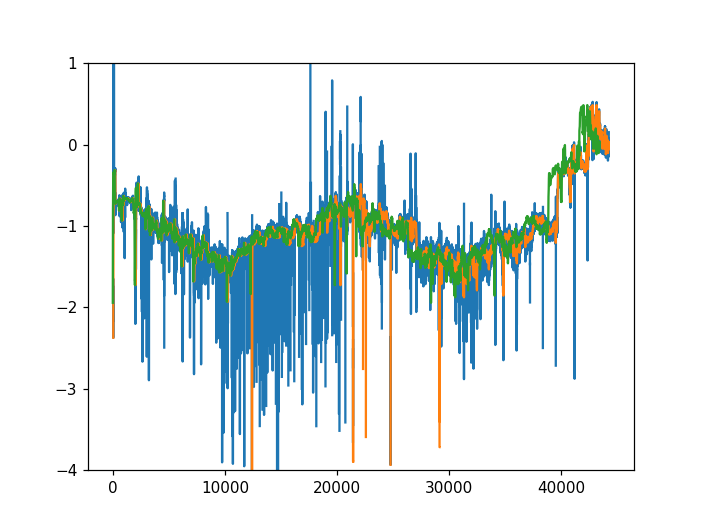

/tmp/ipykernel_504353/1406505064.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(acs['acx_chl_debiased'].values[i2f][innan]))
/tmp/ipykernel_504353/1406505064.py:3: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(acs['acx_chl_debiased'].values[i2f][innan]))
/tmp/ipykernel_504353/1406505064.py:10: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(acs_filtered_x['acx_chl_debiased'].values))
/tmp/ipykernel_504353/1406505064.py:10: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(acs_filtered_x['acx_chl_debiased'].values))


(-4.0, 1.0)

In [101]:
# step x - # filters w.r.t. i2fn (mQ interval + previous manual spike removal) and innan
plt.figure()
plt.plot(np.log10(acs['acx_chl_debiased'].values[i2f][innan]))
ix = xr.DataArray(acs.time[i2f][innan], dims=['time']) 
acs_filtered_x = acs.sel(time = ix)
acs_filtered_x['acx_chl_nomedfilt'] = acs.acx_chl[i2f][innan] # save non-filtered data
acs_filtered_x['acx_chl_debiased_nomedfilt'] = acs.acx_chl_debiased[i2f][innan]
acs_filtered_x['acx_chl'].values = sg.medfilt(acs.acx_chl[i2f][innan], kernel_size=31) # apply med filter to acx chl and acx chl debiasesd 
acs_filtered_x['acx_chl_debiased'].values = sg.medfilt(acs.acx_chl_debiased[i2f][innan], kernel_size=31)
plt.plot(np.log10(acs_filtered_x['acx_chl_debiased'].values))

# step y - # filters w.r.t. ap (10the element) being > 
i2kp = np.where(np.logical_or(acs_filtered_x.acs_ap[:,10] > 0,acs_filtered_x.ac9_ap[:,0] >0))[0]
iy = xr.DataArray(acs_filtered_x.time[i2kp], dims=['time']) 
acs_filtered_xy = acs_filtered_x.sel(time = iy)

# step z - # filters w.r.t. acs chl being > 0
i2kp = np.where((acs_filtered_xy.acx_chl[:] > 0.01)) [0]
iz = xr.DataArray(acs_filtered_xy.time[i2kp], dims=['time']) 
acs_filtered_xyz = acs_filtered_xy.sel(time = iz)


#acs_filtered_xyz = acs_filtered_xyz_temp
#plt.figure()
#plt.plot(acs_filtered_xyz['uway_lat'],np.log10(acs_filtered_xyz['acs_chl_debiased'].values),color='red')
#plt.plot(acs_filtered_x['uway_lat'],np.log10(acs_filtered_x['acs_chl_debiased'].values), color='pink')

#plt.plot(np.log10(acs_filtered_xy['acx_chl_debiased'].values))
plt.plot(np.log10(acs_filtered_xyz['acx_chl_debiased'].values))
plt.ylim(-4,1)

<IPython.core.display.Javascript object>


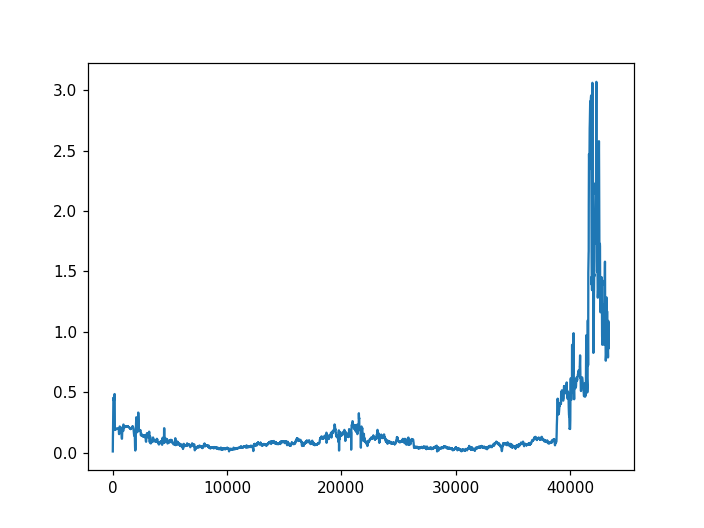

In [102]:
plt.figure()
plt.plot(acs_filtered_xyz.acx_chl_debiased)

#acs_filtered_xyz.uway_lat[:])
# repeat for ACS 2
#plt.figure()
#plt.plot(np.log10(acs['acs2_chl_debiased'].values[i2f][innan2]))
#ix = xr.DataArray(acs.time[i2f][innan2], dims=['time']) 
#acs2_filtered_x = acs.sel(time = ix)
#acs2_filtered_x['acs2_chl'].values = sg.medfilt(acs.acs2_chl[i2f][innan2], kernel_size=31) # apply med filter to acx chl and acx chl debiasesd 
#acs2_filtered_x['acs2_chl_debiased'].values = sg.medfilt(acs.acs2_chl_debiased[i2f][innan2], kernel_size=31)
#plt.plot(np.log10(acs2_filtered_x['acs2_chl_debiased'].values))

# step y - # filters w.r.t. ap (10the element) being > 0
#i2kp = np.where((acs2_filtered_x.acs2_ap[:,10] > 0))[0]
#iy = xr.DataArray(acs2_filtered_x.time[i2kp], dims=['time']) 
#acs2_filtered_xy = acs2_filtered_x.sel(time = iy)

# step z - # filters w.r.t. acs chl being > 0
#i2kp = np.where((acs2_filtered_xy.acs2_chl[:] > 0)) [0]
#iz = xr.DataArray(acs2_filtered_xy.time[i2kp], dims=['time']) 
#acs2_filtered_xyz = acs2_filtered_xy.sel(time = iz)

#plt.figure()
#plt.plot(acs2_filtered_xyz['uway_lat'], np.log10(acs2_filtered_xyz['acs2_chl_debiased'].values),color='red')
#plt.plot(acs2_filtered_x['uway_lat'], np.log10(acs2_filtered_x['acs2_chl_debiased'].values), color='pink')


In [103]:
acs_filtered2 = acs_filtered_xyz
#acs_filtered2 = acs_filtered2.rename_vars({'time_': 'time'}, )

<IPython.core.display.Javascript object>


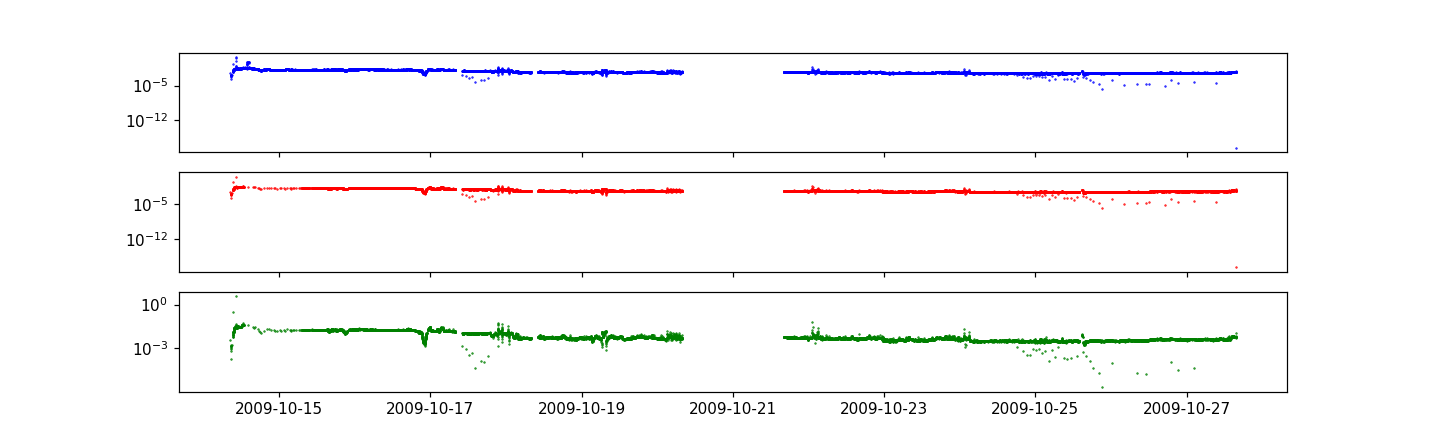

In [104]:
# plot to check                   
#iwv = np.where(acs_filtered.acs_wv==490)[0]
#fig, [ax, ax2] = plt.subplots(2,1, figsize=(13, 4), sharex=True)

#ax.semilogy(acs_filtered.time_[:], acs_filtered.acs_ap[:,iwv], 'b.', ms=1)
# ax.semilogy(acs_filtered.time_[:], sg.medfilt(x, 151), 'b.', ms=1)
#ax.semilogy(acs_filtered2.time, acs_filtered2.acs_ap[:,iwv], 'ro', ms=1, mfc='none', alpha=0.5)
#ax.grid('on')

#ax2.grid('on')

fig, [ax, ax2, ax3] = plt.subplots(3,1, figsize=(13, 4), sharex=True)

iwv = np.where(acs_filtered_x.acs_wv==490)[0]
ax.semilogy(acs.time[:], acs.acs_ap[:,iwv], 'b.', ms=1)

iwv_x = np.where(acs_filtered_x.acs_wv==490)[0]
ax2.semilogy(acs_filtered_x.time[:], acs_filtered_x.acs_ap[:,iwv_x], 'r.', ms=1)

iwv_y = np.where(acs_filtered_xy.acs_wv==490)[0]
ax3.semilogy(acs_filtered_xy.time[:], acs_filtered_xy.acs_ap[:,iwv_y], 'g.', ms=1)
#ax.semilogy(acs_filtered.time[:], sg.medfilt(x, 151), 'b.', ms=1)
#ax.semilogy(acs_filtered2.time, acs_filtered2.acs_ap[:,iwv], 'ro', ms=1, mfc='none', alpha=0.5)
#ax.grid('on')


In [105]:
# save to file for Silvia
# acs_out.to_csv('AMT29_ACS_chl_debiased.csv')
#acs_filtered2 = acs_filtered_xyz 

#print(len(acs_filtered_xyz['time']))
#print(len(acs2_filtered_xyz['time']))

#key_string = acs_filtered_xyz.keys()
#hplc_keys = [s for s in key_string if "hplc" in s]
#other_keys = [s for s in key_string if "hplc" not in s]

#data_vars='all'

#acs_filtered2  = xr.concat([acs_filtered_xyz, acs2_filtered_xyz],data_vars=other_keys,dim='time') # combines the 2 filtered x-rays back into net cdf (hplc keys are common)


plt.plot(a)

NameError: name 'a' is not defined

In [106]:
#test for similar keys between AMT24 and AMT29 (baseline)

#load AMT29 (baseline for netcdf)
path_nc_29 = '/data/lazarev1/backup/cruise_data/AMT29/Public_Read_Only_Copy/DY110_Public/Optics_group/Processed/Underway/Step3/amt29_final_with_debiased_chl.nc'
nc_data_29 = xr.open_dataset(path_nc_29)  

#test for common and unique keys
keys_19 = list(acs_filtered2.keys())
keys_29 = list(nc_data_29.keys())
common_keys = set(keys_19).intersection(set(keys_29)) # keys contained in both cruises
extra_keys_19 =  set(keys_19) ^ common_keys # extra keys in AMT 28
extra_keys_29 = set(keys_29) ^ common_keys # extra keys in AMT29



print('common keys')
print(sorted(common_keys))

print('/n extra keys in amt19')
print(sorted(extra_keys_19))


print('/n extra keys in amt29')
print(sorted(extra_keys_29))

#
#acs_filtered2 = acs_filtered2.rename_vars({"hplc_Chl_c12": "hplc_Chl_c1c2"})
#acs_filtered2 = acs_filtered2.rename_vars({"hplc_Phythin_a": "hplc_Phytin_a"})
#acs_filtered2 = acs_filtered2.rename_vars({"hplc_TAcc": "hplc_Tacc"})
#acs_filtered2 = acs_filtered2.rename_vars({"hplc_TAcc": "hplc_Tacc"})

# manual clean up of AMT 22 keys
acs_filtered2 = acs_filtered2.drop('acs2_N')
acs_filtered2 = acs_filtered2.drop('acs2_ap')
acs_filtered2 = acs_filtered2.drop('acs2_ap_u')
acs_filtered2 = acs_filtered2.drop('acs2_bp')
acs_filtered2 = acs_filtered2.drop('acs2_bp_u')
acs_filtered2 = acs_filtered2.drop('acs2_chl')
acs_filtered2 = acs_filtered2.drop('acs2_cp')
acs_filtered2 = acs_filtered2.drop('acs2_cp_u')
acs_filtered2 = acs_filtered2.drop('acs2_wv')

acs_filtered2 = acs_filtered2.drop('hplc_date_extracted_at_Horn_Point_(month/day/year)')

# clean-up extra pigments




#print('/n extra keys in amt29')
#print(sorted(extra_keys_29))

#print('/n extra keys in amt26')
#print(sorted(extra_keys_26))
#sorted(acs_filtered2.keys())

common keys
['acs_N', 'acs_ap', 'acs_ap_u', 'acs_bp', 'acs_bp_u', 'acs_chl', 'acs_cp', 'acs_cp_u', 'bb3_bb02', 'bb3_bb02_err', 'bb3_bbp', 'bb3_bbp_corr', 'bb3_bbp_err', 'cstar_cp', 'cstar_cp_err', 'flow', 'hplc_Allo', 'hplc_Alpha-beta-Car', 'hplc_But-fuco', 'hplc_Chl_c3', 'hplc_Chlide_a', 'hplc_DP', 'hplc_DV_Chl_a', 'hplc_DV_Chl_b', 'hplc_Diato', 'hplc_Fuco', 'hplc_Hex-fuco', 'hplc_Lut', 'hplc_Neo', 'hplc_PI', 'hplc_PPC', 'hplc_PSC', 'hplc_PSP', 'hplc_Perid', 'hplc_Phide_a', 'hplc_Pras', 'hplc_Tot_Chl_a', 'hplc_Tot_Chl_b', 'hplc_Tot_Chl_c', 'hplc_Viola', 'hplc_Zea', 'hplc_comments', 'hplc_lat', 'hplc_lon', 'hplc_station', 'uway_air_temp', 'uway_fluo', 'uway_lat', 'uway_sal', 'uway_sst', 'uway_trans']
/n extra keys in amt19
['ac9_N', 'ac9_ap', 'ac9_ap_u', 'ac9_bp', 'ac9_bp_u', 'ac9_chl', 'ac9_chl_adj', 'ac9_cp', 'ac9_cp_u', 'acs2_N', 'acs2_ap', 'acs2_ap_u', 'acs2_bp', 'acs2_bp_u', 'acs2_chl', 'acs2_cp', 'acs2_cp_u', 'acx_chl', 'acx_chl_debiased', 'acx_chl_debiased_nomedfilt', 'acx_chl_n

<IPython.core.display.Javascript object>


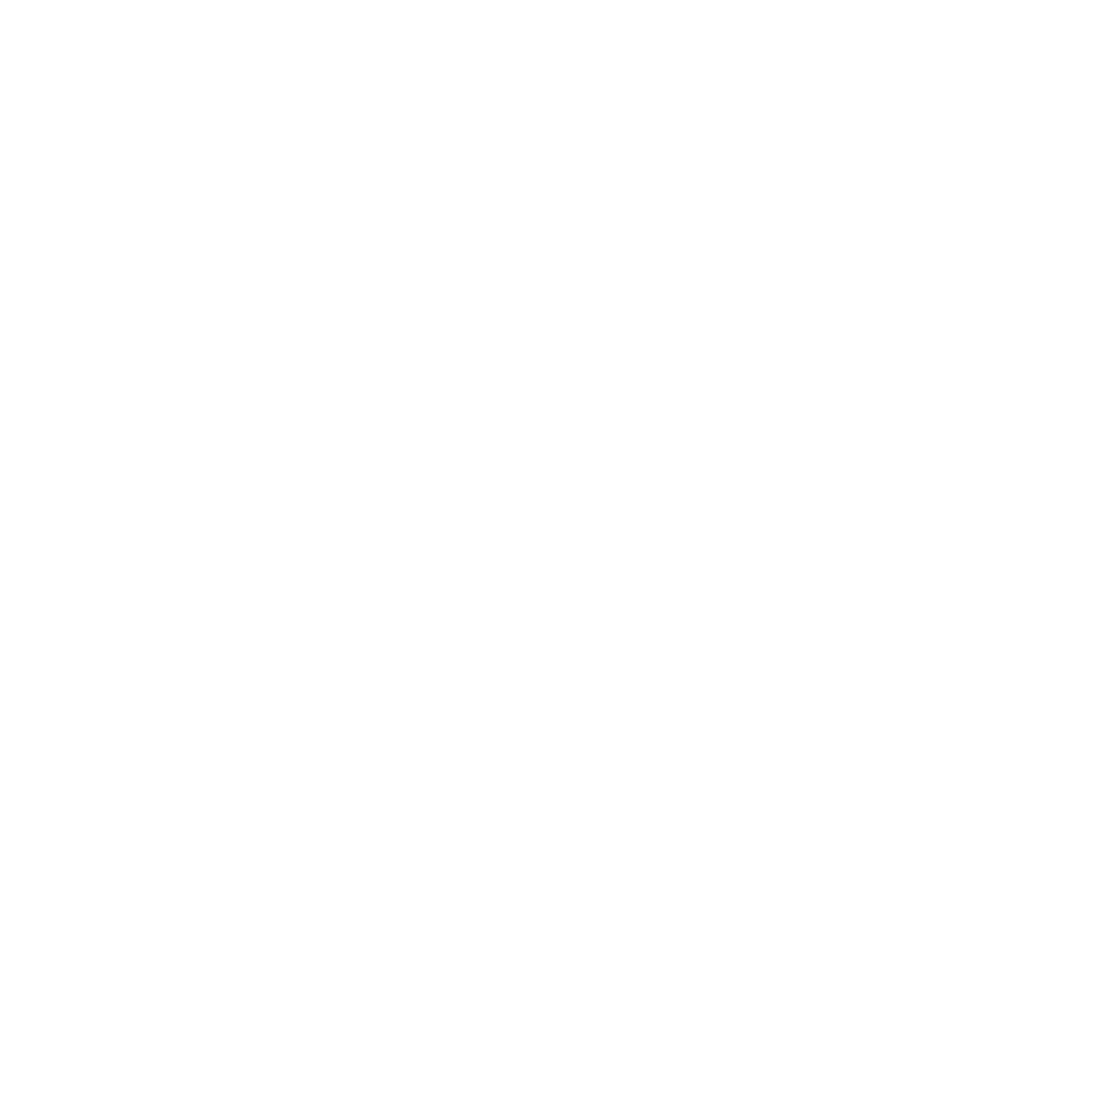

KeyError: 'acs_chl_debiased_nomedfilt'

In [107]:
plt.figure(figsize=(10,10))
plt.plot(np.log10(acs_filtered_xyz['acs_chl_debiased_nomedfilt'].values), color='red', label ='acs_chl_debiased_nomedfilt')
plt.plot(np.log10(acs_filtered_xyz['acs_chl_debiased'].values), color='pink', label ='acs_chl_debiased')
plt.plot(np.log10(acs_filtered_xyz['acs_chl_nomedfilt'].values), color='blue', label ='acs_chl_nomedfilt')
plt.plot(np.log10(acs_filtered_xyz['acs_chl'].values), color='green', label ='acs_chl')
plt.xlim(1500,1700)
plt.ylim(-1,-0)
plt.legend()

In [108]:
print(sorted(acs_filtered2.keys()))
#acs_filtered2['hplc_bottle']))

acs_filtered2 = acs_filtered2.rename_vars({"hplc_Depth_(meters)":"hplc_depth"})


['ac9_N', 'ac9_ap', 'ac9_ap_u', 'ac9_bp', 'ac9_bp_u', 'ac9_chl', 'ac9_chl_adj', 'ac9_cp', 'ac9_cp_u', 'acs_N', 'acs_ap', 'acs_ap_u', 'acs_bp', 'acs_bp_u', 'acs_chl', 'acs_cp', 'acs_cp_u', 'acx_chl', 'acx_chl_debiased', 'acx_chl_debiased_nomedfilt', 'acx_chl_nomedfilt', 'bb3_bb02', 'bb3_bb02_err', 'bb3_bbp', 'bb3_bbp_corr', 'bb3_bbp_err', 'cstar_cp', 'cstar_cp_err', 'flow', 'hplc_Allo', 'hplc_Alpha-beta-Car', 'hplc_But-fuco', 'hplc_Chl_a', 'hplc_Chl_b', 'hplc_Chl_c1', 'hplc_Chl_c12', 'hplc_Chl_c2', 'hplc_Chl_c3', 'hplc_Chlide_a', 'hplc_Cruise_Name', 'hplc_DP', 'hplc_DV_Chl_a', 'hplc_DV_Chl_b', 'hplc_Day_of_Gregorian_Month', 'hplc_Depth_(meters)', 'hplc_Diad', 'hplc_Diato', 'hplc_Filter_diameter', 'hplc_Filter_storage_before_shipping_to_HPL', 'hplc_Filter_type', 'hplc_Fuco', 'hplc_GMT_Time', 'hplc_Gregorian_Month', 'hplc_Hex-fuco', 'hplc_Horn_Point_Lab_sample_code', 'hplc_Indicate_if_filter_is_duplicate', 'hplc_Lut', 'hplc_Name_of_Water_Body', 'hplc_Neo', 'hplc_Original_PI_Sample_Code', 

In [109]:
#acs_filtered2 = acs_filtered2.rename_vars({"hplc_alpha-beta-Car": "hplc_Alpha-beta-Car"})
acs_filtered2 = acs_filtered2.rename_vars({"hplc_Diad": "hplc_Diadino"})

print(list(acs_filtered2.keys()))

['flow', 'acs_chl', 'acs_ap', 'acs_ap_u', 'acs_bp', 'acs_bp_u', 'acs_cp', 'acs_cp_u', 'acs_N', 'ac9_chl', 'ac9_ap', 'ac9_ap_u', 'ac9_bp', 'ac9_bp_u', 'ac9_cp', 'ac9_cp_u', 'ac9_N', 'ac9_chl_adj', 'bb3_bbp', 'bb3_bbp_err', 'bb3_bb02', 'bb3_bb02_err', 'bb3_bbp_corr', 'cstar_cp', 'cstar_cp_err', 'uway_lat', 'uway_lon', 'uway_tsg_temp', 'uway_sst', 'uway_conductivty', 'uway_sal', 'uway_fluo', 'uway_trans', 'uway_air_temp', 'uway_pressure', 'uway_humidty', 'uway_ptir', 'uway_stir', 'uway_ppar', 'uway_spar', 'uway_windspeed', 'uway_winddir', 'hplc_Horn_Point_Lab_sample_code', 'hplc_PI', 'hplc_Original_PI_Sample_Code', 'hplc_Cruise_Name', 'hplc_Sequential_Sample_Number', 'hplc_Indicate_if_filter_is_duplicate', 'hplc_Volume_filtered_(ml)', 'hplc_station', 'hplc_bottle_number', 'hplc_Name_of_Water_Body', 'hplc_Water_Type', 'hplc_collected_with_positive_pressure_or_vaccuum', 'hplc_Year_of_Sample', 'hplc_Gregorian_Month', 'hplc_Day_of_Gregorian_Month', 'hplc_Sequential_Day_of_Year', 'hplc_GMT_Tim

In [113]:
# save updated NetCDF file

acs_filtered2.to_netcdf(DIN_acs + fn_acs[:-3] + '_with_debiased_chl.nc')
acs_filtered2.close()




In [110]:
print(acs_filtered2.keys())

KeysView(<xarray.Dataset>
Dimensions:                                           (time: 43406,
                                                       acs_wv: 176, ac9_wv: 9,
                                                       bb3_wv: 3, hplc_time: 111)
Coordinates:
  * time                                              (time) datetime64[ns] 2...
  * acs_wv                                            (acs_wv) float64 400.0 ...
  * ac9_wv                                            (ac9_wv) float64 412.0 ...
  * bb3_wv                                            (bb3_wv) float64 470.0 ...
  * hplc_time                                         (hplc_time) datetime64[ns] ...
Data variables: (12/107)
    flow                                              (time) float64 48.14 .....
    acs_chl                                           (time) float64 -0.00048...
    acs_ap                                            (time, acs_wv) float64 ...
    acs_ap_u                                          (

<IPython.core.display.Javascript object>


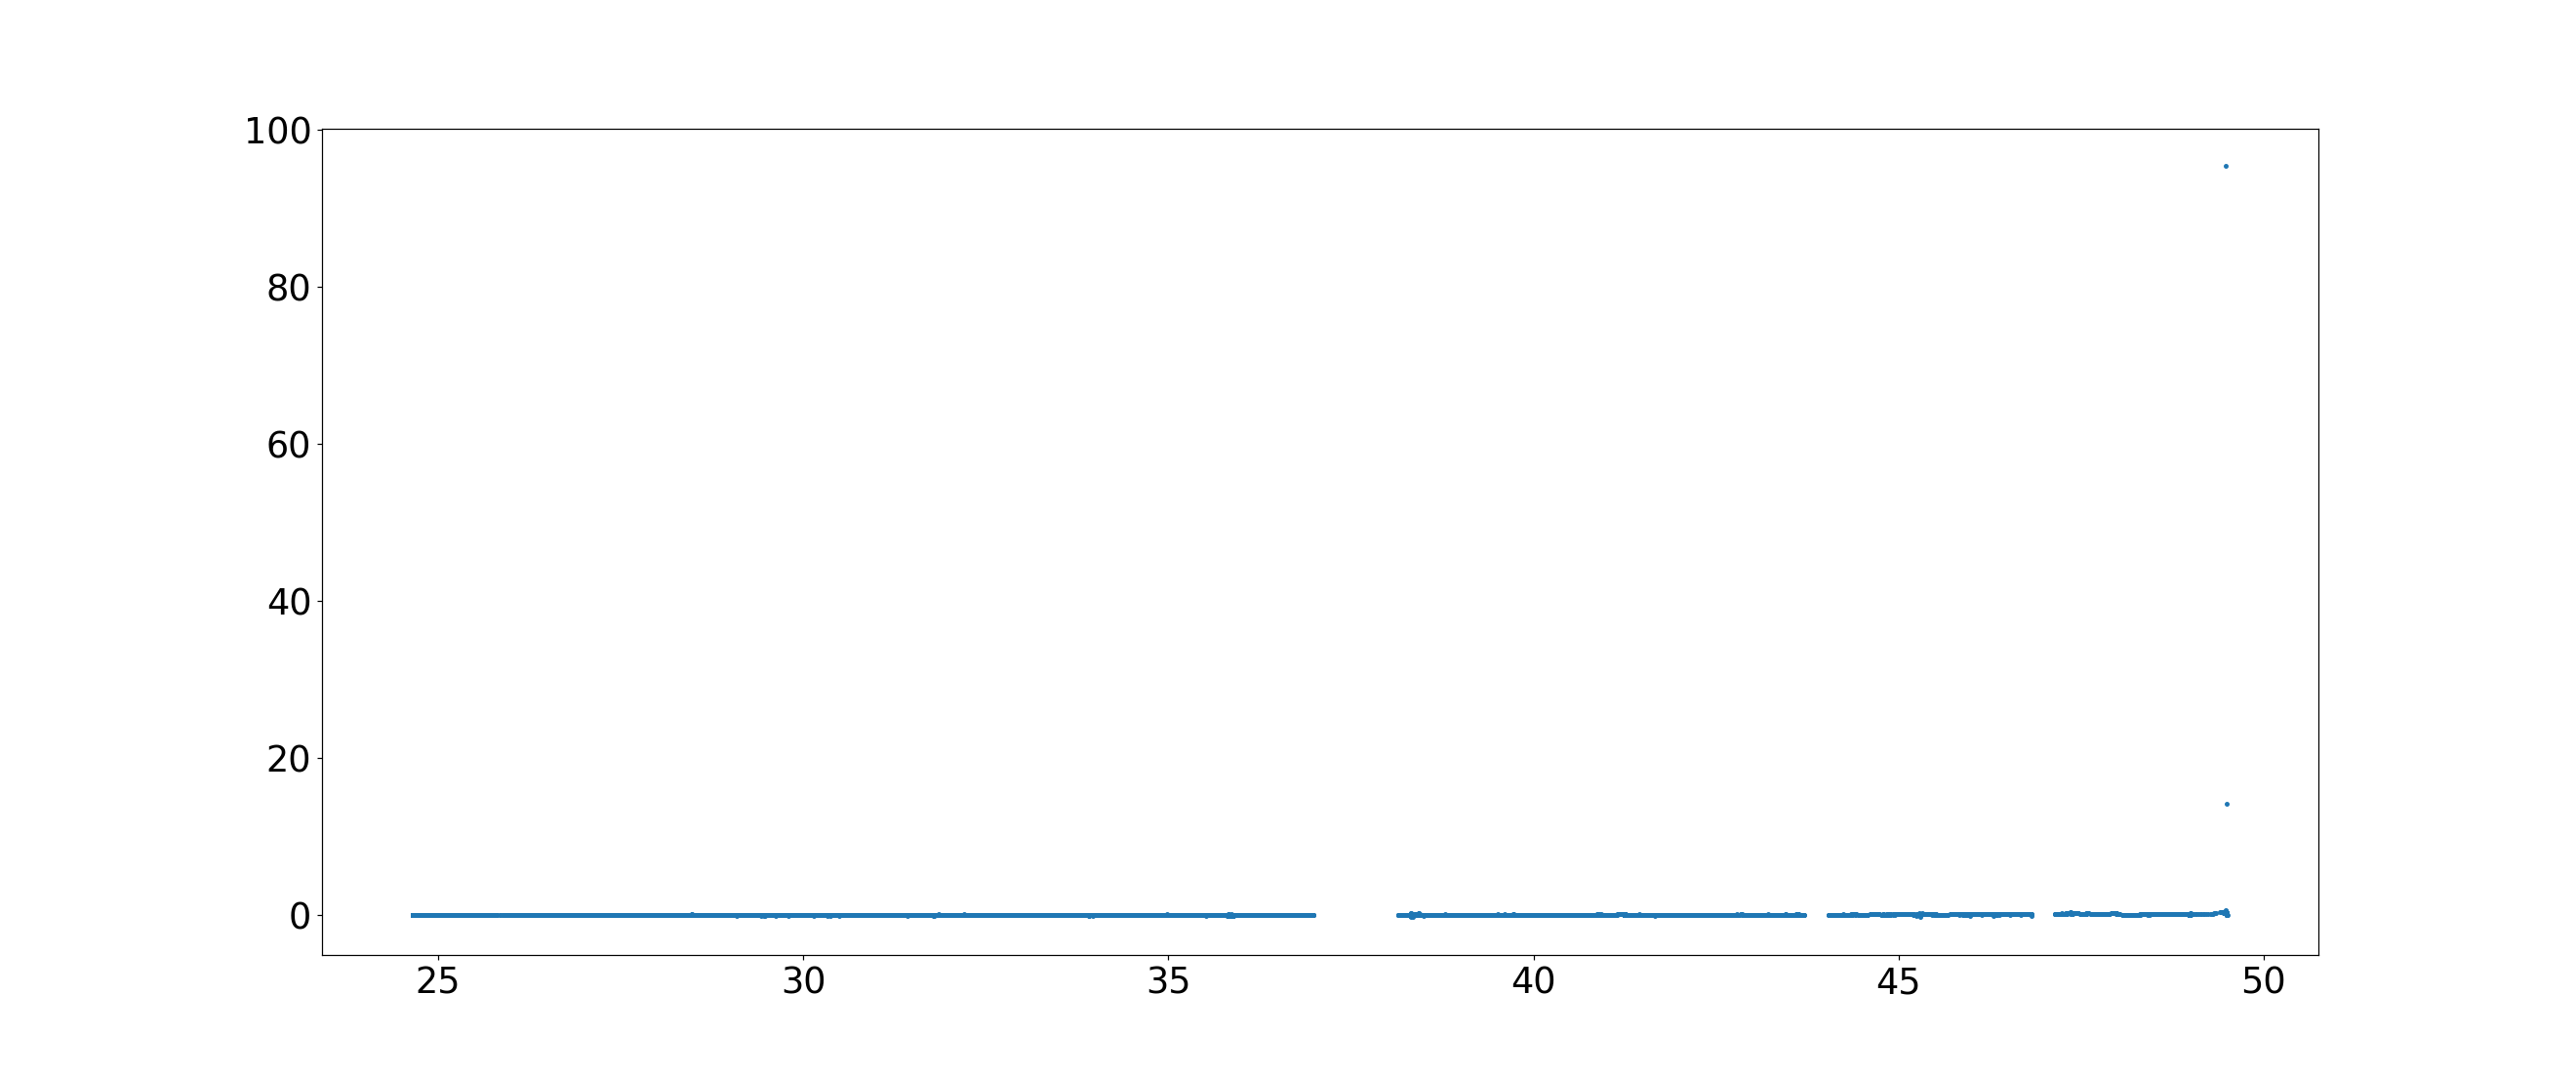

KeyError: 'acs_chl_debiased'

In [111]:

# plot to show debiassing of chl
plt.figure(figsize=(24,10))
plt.rc('font', size=24)

plt.scatter(acs_filtered2['uway_lat'], acs_filtered2['acs_chl'], s=5,label='acs chl ')
plt.scatter(acs_filtered2['uway_lat'], acs_filtered2['acs_chl_debiased'], s=5,label='acs chl debiased')
plt.gca().set_yscale('log')
plt.legend()
plt.xlabel('Latitude')
plt.xlim(-50,50)
plt.ylabel('Chl [mg m$^{-3}$]')
    

In [ ]:
# plot to show acs and ac9 chl separately
plt.figure(figsize=(24,10))
plt.rc('font', size=24)

plt.scatter(acs_filtered2['uway_lat'], acs_filtered2['acs_chl'], s=5,label='acs chl ')
plt.scatter(acs_filtered2['uway_lat'], acs_filtered2['ac9_chl'], s=5,label='ac9 chl')
plt.gca().set_yscale('log')
plt.legend()
plt.xlabel('Latitude')
plt.xlim(-50,50)
plt.ylabel('Chl [mg m$^{-3}$]')

In [ ]:
plt.i
plt.plot(acs_filtered2['acs_chl'])

plt.plot(acs_filtered2['ac9_chl'])

In [88]:
list(acs_filtered2.keys())

['flow',
 'acs_chl',
 'acs_ap',
 'acs_ap_u',
 'acs_bp',
 'acs_bp_u',
 'acs_cp',
 'acs_cp_u',
 'acs_N',
 'acs2_chl',
 'acs2_ap',
 'acs2_ap_u',
 'acs2_bp',
 'acs2_bp_u',
 'acs2_cp',
 'acs2_cp_u',
 'acs2_N',
 'ac9_chl',
 'ac9_ap',
 'ac9_ap_u',
 'ac9_bp',
 'ac9_bp_u',
 'ac9_cp',
 'ac9_cp_u',
 'ac9_N',
 'ac9_chl_adj',
 'bb3_bbp',
 'bb3_bbp_err',
 'bb3_bb02',
 'bb3_bb02_err',
 'bb3_bbp_corr',
 'cstar_cp',
 'cstar_cp_err',
 'uway_lat',
 'uway_lon',
 'uway_tsg_temp',
 'uway_sst',
 'uway_conductivty',
 'uway_sal',
 'uway_fluo',
 'uway_trans',
 'uway_air_temp',
 'uway_pressure',
 'uway_humidty',
 'uway_ptir',
 'uway_stir',
 'uway_ppar',
 'uway_spar',
 'uway_windspeed',
 'uway_winddir',
 'hplc_Horn_Point_Lab_sample_code',
 'hplc_PI',
 'hplc_Original_PI_Sample_Code',
 'hplc_Cruise_Name',
 'hplc_Sequential_Sample_Number',
 'hplc_Indicate_if_filter_is_duplicate',
 'hplc_Volume_filtered_(ml)',
 'hplc_station',
 'hplc_bottle_number',
 'hplc_Name_of_Water_Body',
 'hplc_Water_Type',
 'hplc_collected_wit